In [1]:
import numpy as np
import pandas as pd

gtd = pd.read_excel('globalterrorismdb_0919dist.xlsx','Data')

In [2]:
gtd.shape

(121629, 77)

In [3]:
#isnull = gtd.isnull().sum()

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #print(isnull)

In [4]:
gtd = gtd[~(gtd['doubtterr'] == 1)]

In [5]:
gtd = gtd.dropna(subset=['latitude', 'longitude', 'provstate'])

In [6]:
gtd.shape

(101024, 77)

In [7]:
gtd = gtd[gtd['iyear'] >= 2010]

In [8]:
gtd.shape

(79140, 77)

In [9]:
isnull = gtd.isnull().sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(isnull)

eventid                   0
iyear                     0
imonth                    0
iday                      0
extended                  0
country_txt               0
provstate                 0
city                    105
latitude                  0
longitude                 0
summary                   0
crit1                     0
crit2                     0
crit3                     0
doubtterr                 0
multiple                  0
success                   0
suicide                   0
attacktype1               0
attacktype1_txt           0
attacktype2           75065
attacktype2_txt       75065
attacktype3           78819
attacktype3_txt       78819
targtype1                 0
targtype1_txt             0
natlty1                1179
natlty1_txt            1179
targtype2             71519
targtype2_txt         71519
natlty2               71548
natlty2_txt           71548
targtype3             78406
targtype3_txt         78406
natlty3               78408
natlty3_txt         

In [10]:
gtd = gtd.drop(columns=['doubtterr'])

In [11]:
describe = gtd.describe()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(describe)

            eventid         iyear        imonth          iday      extended  \
count  7.914000e+04  79140.000000  79140.000000  79140.000000  79140.000000   
mean   2.014500e+11   2014.433599      6.450354     15.666174      0.068954   
std    2.230281e+08      2.231387      3.403961      8.782499      0.253377   
min    2.010010e+11   2010.000000      1.000000      0.000000      0.000000   
25%    2.013053e+11   2013.000000      4.000000      8.000000      0.000000   
50%    2.014123e+11   2014.000000      6.000000     16.000000      0.000000   
75%    2.016083e+11   2016.000000      9.000000     23.000000      0.000000   
max    2.018123e+11   2018.000000     12.000000     31.000000      1.000000   

           latitude     longitude    crit1         crit2         crit3  \
count  79140.000000  79140.000000  79140.0  79140.000000  79140.000000   
mean      26.272015     51.827972      1.0      0.999987      0.999848   
std       13.066378     34.083982      0.0      0.003555      0.01

## Dataset = Type Unknown

In [12]:
gtd_type_unknown = gtd[gtd['attacktype1'] == 9]

In [13]:
gtd = gtd[~(gtd['attacktype1'] == 9)]

In [14]:
gtd.shape

(76159, 76)

In [15]:
gtd.shape

(76159, 76)

In [16]:
isnull = gtd.isnull().sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(isnull)

eventid                   0
iyear                     0
imonth                    0
iday                      0
extended                  0
country_txt               0
provstate                 0
city                    101
latitude                  0
longitude                 0
summary                   0
crit1                     0
crit2                     0
crit3                     0
multiple                  0
success                   0
suicide                   0
attacktype1               0
attacktype1_txt           0
attacktype2           72084
attacktype2_txt       72084
attacktype3           75838
attacktype3_txt       75838
targtype1                 0
targtype1_txt             0
natlty1                1161
natlty1_txt            1161
targtype2             68915
targtype2_txt         68915
natlty2               68942
natlty2_txt           68942
targtype3             75461
targtype3_txt         75461
natlty3               75463
natlty3_txt           75463
gname               

In [17]:
(gtd[gtd['success'] == 1].shape[0] / gtd.shape[0]) * 100

85.59198518888115

In [18]:
gtd['nperps_impute'] = gtd.nperps[~((gtd['nperps'] == -99) | (gtd['nperps'] == -9))]
gtd['nperpcap_impute'] = gtd.nperpcap[~((gtd['nperpcap'] == -99) | (gtd['nperps'] == -9))]
gtd['nkill_impute'] = gtd['nkill']
gtd['nwound_impute'] = gtd['nwound']
gtd['nwoundte_impute'] = gtd['nwoundte']
#gtd['propvalue_impute'] = gtd.propvalue[~(gtd['propvalue'] == -99)]
gtd['nhostkid_impute'] = gtd.nhostkid[~(gtd['nhostkid'] == -99)]
#gtd['ransomamt_impute'] = gtd.ransomamt[~(gtd['ransomamt'] == -99)]
#gtd['ransompaid_impute'] = gtd.ransompaid[~(gtd['ransompaid'] == -99)]

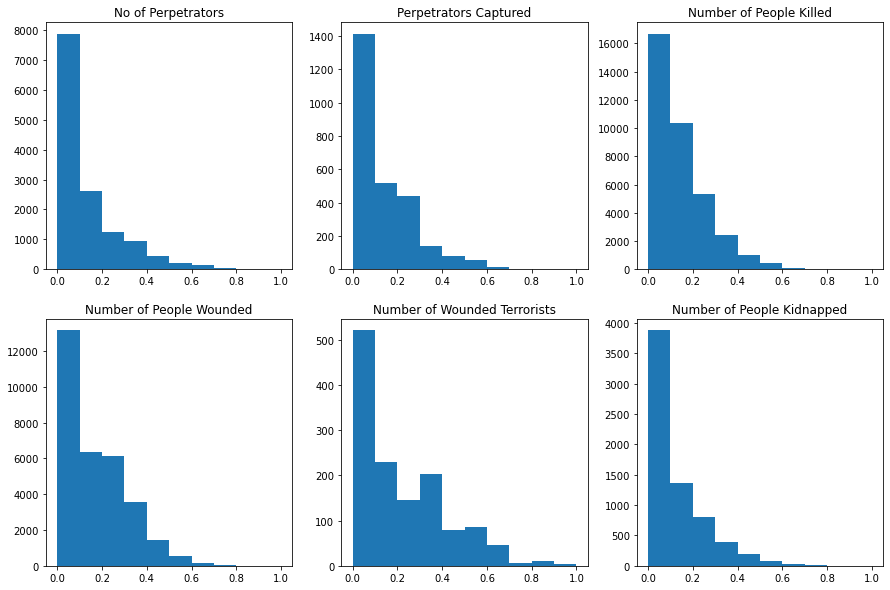

In [19]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(2, 3, figsize=(15, 10))

test = gtd['nperps_impute'].dropna()
normalised = test.apply(np.log)
normalised = normalised[np.isfinite(normalised)]
normalised = (normalised - normalised.min()) / (normalised.max() - normalised.min())
gtd['nperps_norm'] = normalised
axis[0,0].set_title('No of Perpetrators')
axis[0,0].hist(normalised, bins = 10)

test = gtd['nperpcap_impute'].dropna()
normalised = test.apply(np.log)
normalised = normalised[np.isfinite(normalised)]
normalised = (normalised - normalised.min()) / (normalised.max() - normalised.min())
gtd['nperpcap_norm'] = normalised
axis[0,1].set_title('Perpetrators Captured')
axis[0,1].hist(normalised)

test = gtd['nkill_impute'].dropna()
normalised = test.apply(np.log)
normalised = normalised[np.isfinite(normalised)]
normalised = (normalised - normalised.min()) / (normalised.max() - normalised.min())
gtd['nkill_norm'] = normalised
axis[0,2].set_title('Number of People Killed')
axis[0,2].hist(normalised)

test = gtd['nwound_impute'].dropna()
normalised = test.apply(np.log)
normalised = normalised[np.isfinite(normalised)]
normalised = (normalised - normalised.min()) / (normalised.max() - normalised.min())
gtd['nwound_norm'] = normalised
axis[1,0].set_title('Number of People Wounded')
axis[1,0].hist(normalised)

test = gtd['nwoundte_impute'].dropna()
normalised = test.apply(np.log)
normalised = normalised[np.isfinite(normalised)]
normalised = (normalised - normalised.min()) / (normalised.max() - normalised.min())
gtd['nwoundte_norm'] = normalised
axis[1,1].set_title("Number of Wounded Terrorists")
axis[1,1].hist(normalised)

test = gtd['nhostkid_impute'].dropna()
normalised = test.apply(np.log)
normalised = normalised[np.isfinite(normalised)]
normalised = (normalised - normalised.min()) / (normalised.max() - normalised.min())
gtd['nhostkid_norm'] = normalised
axis[1,2].set_title("Number of People Kidnapped")
axis[1,2].hist(normalised)

"""
test = gtd['nhostkid_impute'].fillna(gtd['nhostkid_impute'].mean())
normalised = test.apply(np.log)
normalised = normalised[np.isfinite(normalised)]
normalised = (normalised - normalised.min()) / (normalised.max() - normalised.min())
gtd['nhostkid_norm'] = normalised
axis[1,2].set_title("Number of People Kidnapped")
axis[1,2].hist(normalised)
"""

plt.show()

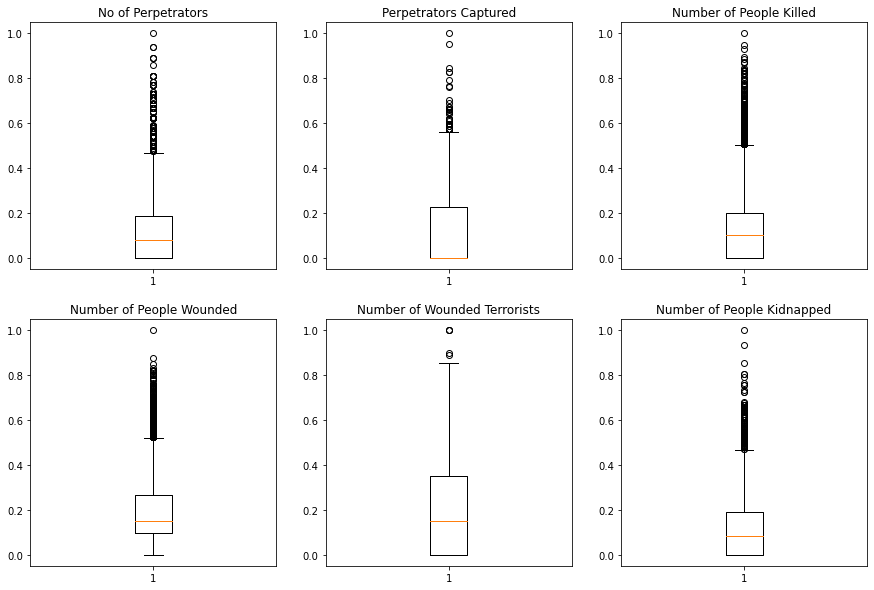

In [20]:
fig, axis = plt.subplots(2, 3, figsize=(15, 10))

test = gtd['nperps_norm'].dropna()
axis[0,0].set_title('No of Perpetrators')
axis[0,0].boxplot(test)

test = gtd['nperpcap_norm'].dropna()
axis[0,1].set_title('Perpetrators Captured')
axis[0,1].boxplot(test)

test = gtd['nkill_norm'].dropna()
axis[0,2].set_title('Number of People Killed')
axis[0,2].boxplot(test)

test = gtd['nwound_norm'].dropna()
axis[1,0].set_title('Number of People Wounded')
axis[1,0].boxplot(test)

test = gtd['nwoundte_norm'].dropna()
axis[1,1].set_title("Number of Wounded Terrorists")
axis[1,1].boxplot(test)

test = gtd['nhostkid_norm'].dropna()
axis[1,2].set_title("Number of People Kidnapped")
axis[1,2].boxplot(test)

plt.show()

In [21]:
gtd_clust_data = gtd[((gtd['nkill'] > 0) | (gtd['nperps'] > 0) | (gtd['nwound'] > 0) | (gtd['property'] == 1))]

In [22]:
isnull = gtd_clust_data.isnull().sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(isnull)

eventid                   0
iyear                     0
imonth                    0
iday                      0
extended                  0
country_txt               0
provstate                 0
city                     85
latitude                  0
longitude                 0
summary                   0
crit1                     0
crit2                     0
crit3                     0
multiple                  0
success                   0
suicide                   0
attacktype1               0
attacktype1_txt           0
attacktype2           58962
attacktype2_txt       58962
attacktype3           62553
attacktype3_txt       62553
targtype1                 0
targtype1_txt             0
natlty1                 643
natlty1_txt             643
targtype2             56198
targtype2_txt         56198
natlty2               56221
natlty2_txt           56221
targtype3             62223
targtype3_txt         62223
natlty3               62225
natlty3_txt           62225
gname               

In [23]:
gtd_clust_kmode = pd.DataFrame(gtd_clust_data, columns = ['success',
                                                         'suicide',
                                                         'attacktype1_txt',
                                                         'targtype1_txt',
                                                         'propextent_txt',
                                                         'ishostkid'])

In [24]:
import numpy as np
from kmodes.kmodes import KModes

In [25]:
gtd_clust_kmode['propextent_txt'] = gtd_clust_kmode['propextent_txt'].fillna('Unknown')

In [26]:
gtd_clust_kmode = gtd_clust_kmode[~(gtd_clust_kmode['ishostkid'] == -9)]

In [27]:
gtd_clust_kmode.describe()

success       suicide     ishostkid
count  62656.000000  62656.000000  62656.000000
mean       0.936510      0.065389      0.072523
std        0.243843      0.247213      0.259354
min        0.000000      0.000000      0.000000
25%        1.000000      0.000000      0.000000
50%        1.000000      0.000000      0.000000
75%        1.000000      0.000000      0.000000
max        1.000000      1.000000      1.000000

In [28]:
attacktype = pd.get_dummies(gtd_clust_kmode['attacktype1_txt'])
targettype = pd.get_dummies(gtd_clust_kmode['targtype1_txt'])
propextent = pd.get_dummies(gtd_clust_kmode['propextent_txt'])

In [29]:
targettype = targettype.rename(columns={"Unknown": "Target Unknown"})
propextent = propextent.rename(columns={"Unknown": "PropDamage Unknown"})

In [30]:
gtd_clust_kmode_fil = pd.concat([gtd_clust_kmode['success'],
                                 gtd_clust_kmode['suicide'],
                                 gtd_clust_kmode['ishostkid'],
                                 attacktype, targettype, propextent], axis = 1)

In [31]:
gtd_clust_kmode_fil.isnull().sum()

success                                          0
suicide                                          0
ishostkid                                        0
Armed Assault                                    0
Assassination                                    0
Bombing/Explosion                                0
Facility/Infrastructure Attack                   0
Hijacking                                        0
Hostage Taking (Barricade Incident)              0
Hostage Taking (Kidnapping)                      0
Unarmed Assault                                  0
Abortion Related                                 0
Airports & Aircraft                              0
Business                                         0
Educational Institution                          0
Food or Water Supply                             0
Government (Diplomatic)                          0
Government (General)                             0
Journalists & Media                              0
Maritime                       

In [32]:
describe = gtd_clust_kmode_fil.describe()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(describe)

            success       suicide     ishostkid  Armed Assault  Assassination  \
count  62656.000000  62656.000000  62656.000000   62656.000000   62656.000000   
mean       0.936510      0.065389      0.072523       0.247159       0.082562   
std        0.243843      0.247213      0.259354       0.431363       0.275221   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%        1.000000      0.000000      0.000000       0.000000       0.000000   
50%        1.000000      0.000000      0.000000       0.000000       0.000000   
75%        1.000000      0.000000      0.000000       0.000000       0.000000   
max        1.000000      1.000000      1.000000       1.000000       1.000000   

       Bombing/Explosion  Facility/Infrastructure Attack     Hijacking  \
count       62656.000000                    62656.000000  62656.000000   
mean            0.522679                        0.071294      0.003304   
std             0.499489                        

In [33]:

from sklearn.metrics import silhouette_score

cost = []
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):    
    kmode = KModes(n_clusters=k, init = "Huang", n_init = 1, verbose=1)
    kmode.fit_predict(gtd_clust_kmode_fil)
    labels = kmode.labels_
    sil.append(silhouette_score(gtd_clust_kmode_fil, labels, metric = 'euclidean'))
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10209, cost: 133749.0
Run 1, iteration: 2/100, moves: 2607, cost: 133749.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 843, cost: 132351.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 22673, cost: 110911.0
Run 1, iteration: 2/100, moves: 5956, cost: 110911.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6194, cost: 104579.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2974, cost: 97805.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12655, cost: 91496.0
Run 1, iteration: 2/100, moves: 1601, cost: 91221.0
Run 1, iteration: 3/100, moves: 181, cost: 9

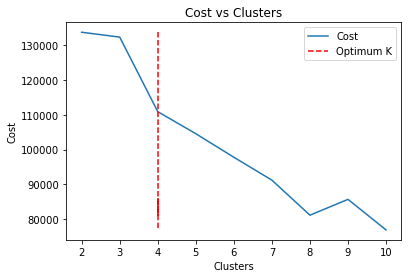

In [34]:
y = np.array([i for i in range(2,11)])
line = []
for i in range(2,11):
    line.append(4)
plt.title("Cost vs Clusters")
plt.xlabel("Clusters")
plt.ylabel("Cost")
plt.plot(y,cost)
plt.plot(line,cost,'r--')
plt.legend(['Cost', 'Optimum K'])
plt.show()

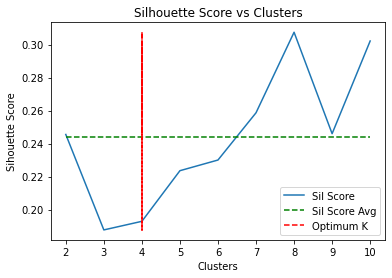

[4, 4, 4, 4, 4, 4, 4, 4, 4]


In [35]:
y = np.array([i for i in range(2,11)])
avg = []
for i in range(2,11):
    avg.append((sum(sil) / len(sil)))
line = []
for i in range(2,11):
    line.append(4)
plt.title("Silhouette Score vs Clusters")
plt.xlabel("Clusters")
plt.ylabel("Sihouette Score")
plt.plot(y,sil)
plt.plot(y,avg,'g--')
plt.plot(line,sil,'r--')
plt.legend(['Sil Score', 'Sil Score Avg', 'Optimum K'])
plt.show()
print(line)

In [116]:
kmode = KModes(n_clusters=7, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = kmode.fit_predict(gtd_clust_kmode_fil)

# Predicted clusters
labels = kmode.labels_
centroids = kmode.cluster_centroids_
fitClusters_huang

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9336, cost: 89594.0
Run 1, iteration: 2/100, moves: 48, cost: 89594.0


array([4, 4, 4, ..., 3, 3, 1], dtype=uint16)

In [117]:
gtd_clust_kmode_fil_done = gtd_clust_kmode_fil.merge(gtd_clust_data['latitude'], left_index=True, right_index=True)
gtd_clust_kmode_fil_done = gtd_clust_kmode_fil_done.merge(gtd_clust_data['longitude'], left_index=True, right_index=True)
gtd_clust_kmode_fil_done = gtd_clust_kmode_fil_done.merge(gtd_clust_data['country_txt'], left_index=True, right_index=True)
gtd_clust_kmode_fil_done = gtd_clust_kmode_fil_done.merge(gtd_clust_data['attacktype1_txt'], left_index=True, right_index=True)
gtd_clust_kmode_fil_done = gtd_clust_kmode_fil_done.merge(gtd_clust_data['targtype1_txt'], left_index=True, right_index=True)
gtd_clust_kmode_fil_done = gtd_clust_kmode_fil_done.merge(gtd_clust_data['propextent_txt'], left_index=True, right_index=True)
gtd_clust_kmode_fil_done = gtd_clust_kmode_fil_done.merge(gtd_clust_data['iyear'], left_index=True, right_index=True)
gtd_clust_kmode_fil_done = gtd_clust_kmode_fil_done.merge(gtd_clust_data['nkill'], left_index=True, right_index=True)

In [118]:
gtd_clust_kmode_fil_done = gtd_clust_kmode_fil_done.reset_index(drop = True)

In [120]:
clustersDf = pd.DataFrame(fitClusters_huang)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([gtd_clust_kmode_fil_done, clustersDf], axis = 1).reset_index(drop = True)

In [121]:
from matplotlib.colors import ListedColormap
import seaborn as sns

# construct cmap
cmap = ListedColormap(sns.color_palette())

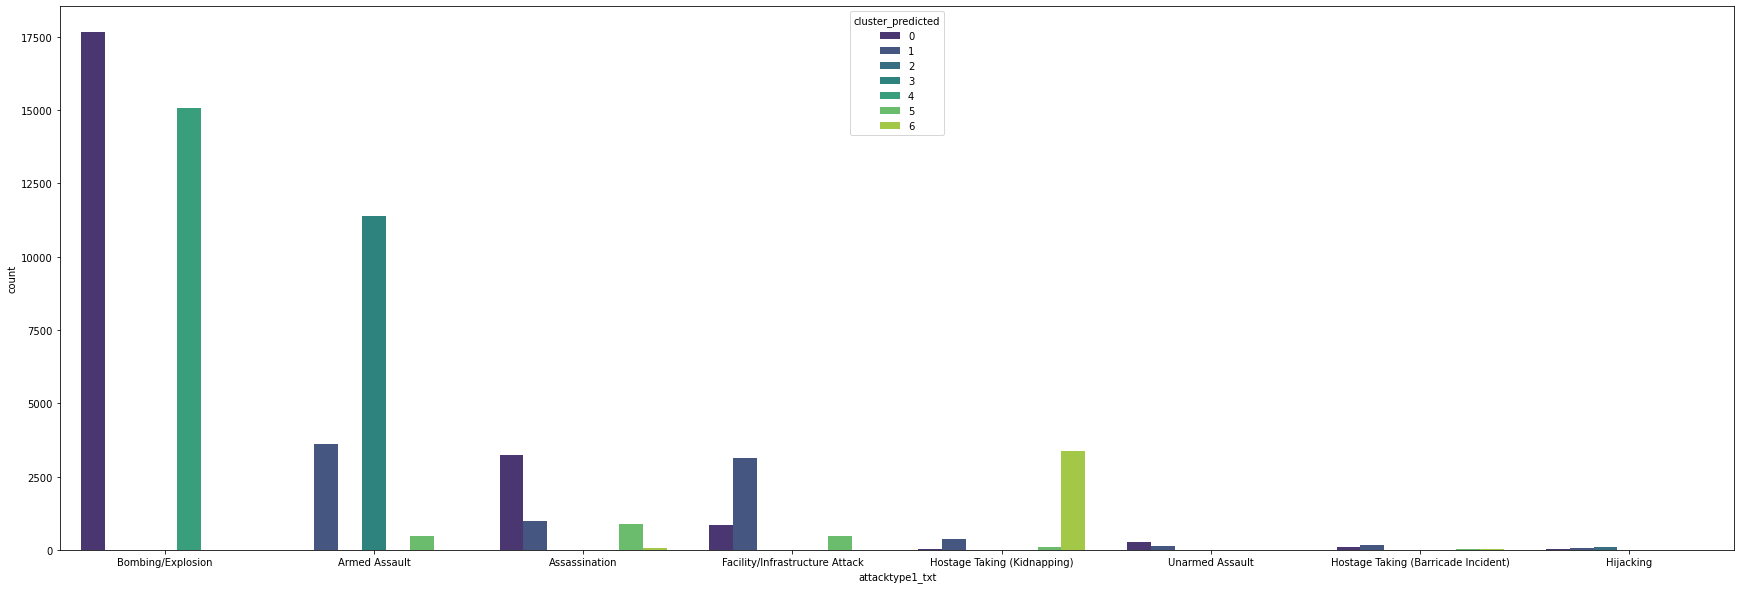

In [122]:
plt.subplots(figsize = (30,10))
sns.countplot(x=combinedDf['attacktype1_txt'],order=combinedDf['attacktype1_txt'].value_counts().index,hue=combinedDf['cluster_predicted'], palette="viridis")
#sns.color_palette("husl", 9)
plt.show()

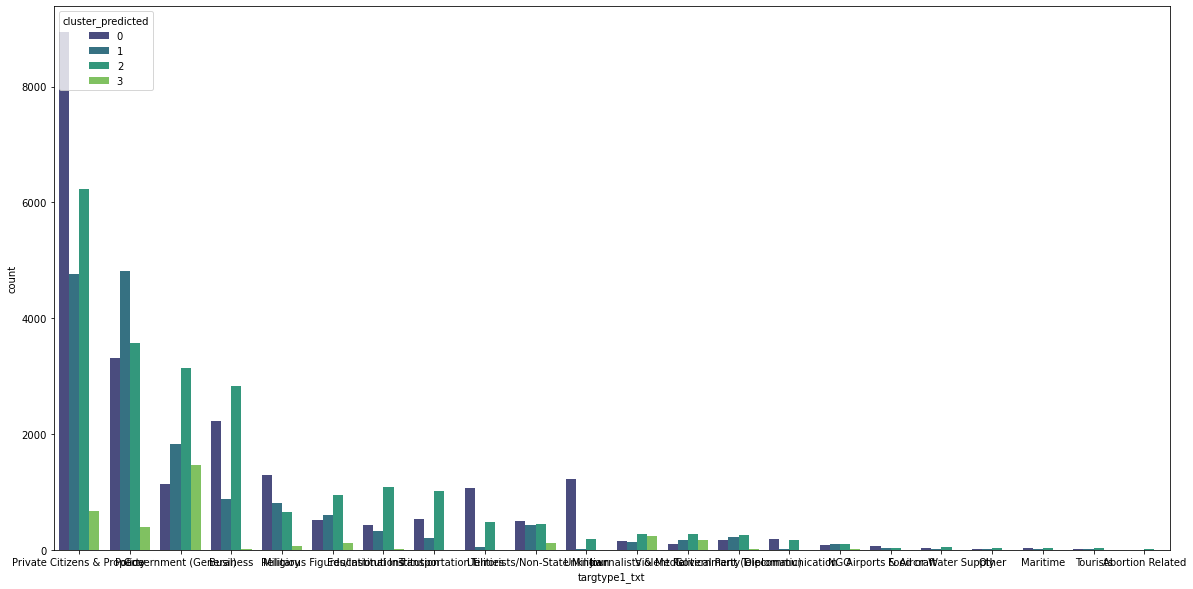

In [42]:
plt.subplots(figsize = (20,10))
sns.countplot(x=combinedDf['targtype1_txt'],order=combinedDf['targtype1_txt'].value_counts().index,hue=combinedDf['cluster_predicted'], palette="viridis")
plt.show()

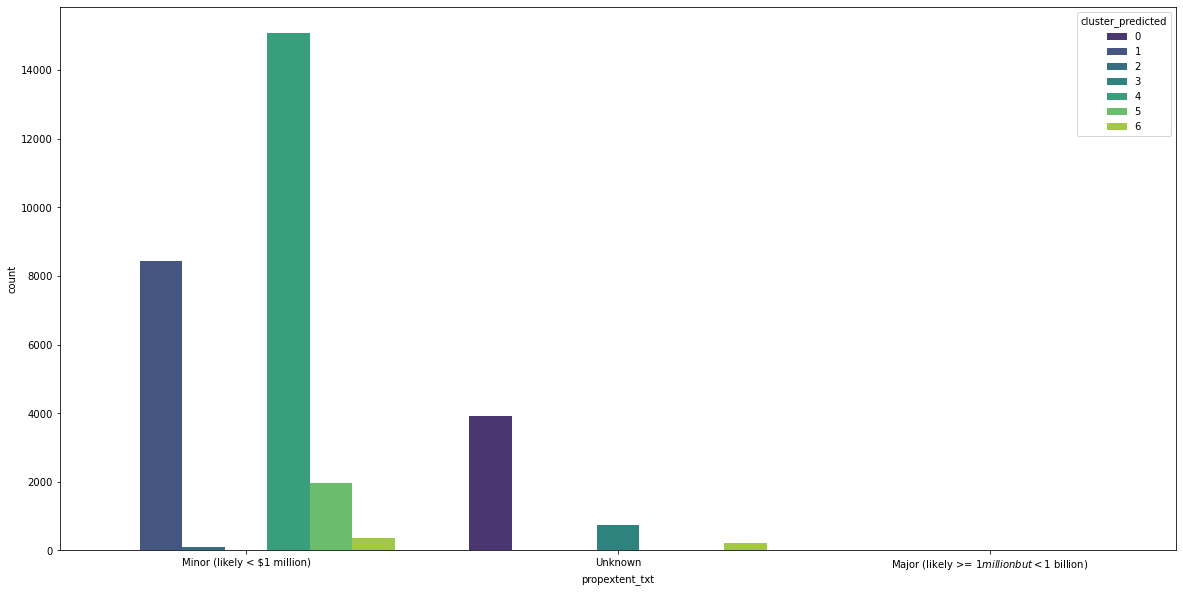

In [123]:
plt.subplots(figsize = (20,10))
sns.countplot(x=combinedDf['propextent_txt'],order=combinedDf['propextent_txt'].value_counts().index,hue=combinedDf['cluster_predicted'], palette="viridis")
plt.show()

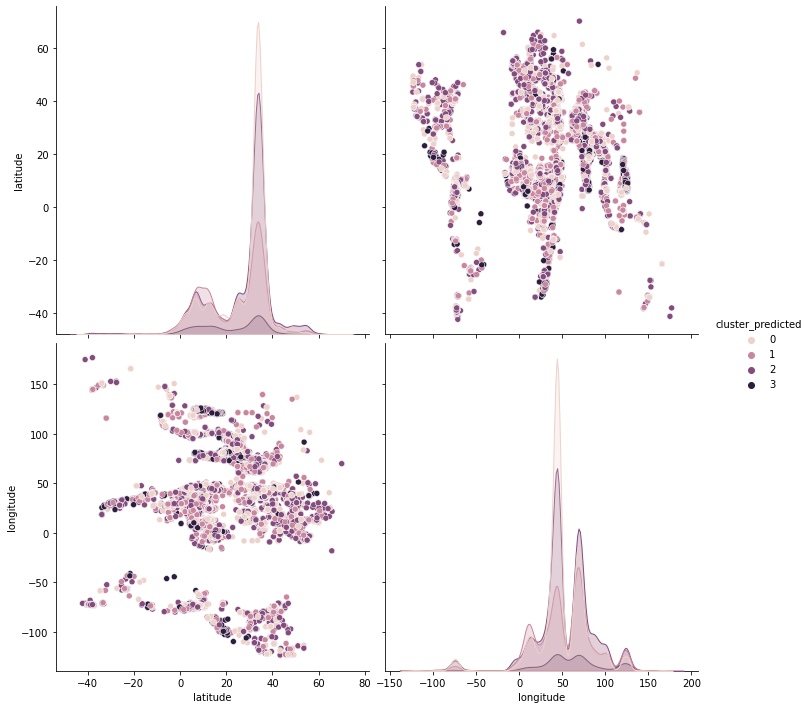

In [44]:
sns.pairplot(data=combinedDf, hue='cluster_predicted', diag_kind="kde", vars=['latitude', 'longitude'], height=5);
plt.show()

In [45]:
import plotly.graph_objs as go
from  plotly.offline import plot
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected='true')

In [46]:
"""
data_frame_trimmed = combinedDf.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

data = [dict(type='choropleth',
             locations = data_frame_trimmed['country_txt'],
             locationmode = 'country names',
             z = data_frame_trimmed['cluster_predicted'],
             text = data_frame_trimmed['country_txt'],
             colorbar = {'title':'Cluster Group'})]
layout = dict(title='Clustering of Countries based on K-Means',
              geo = dict(projection = {'type':'mercator'}))
map1 = go.Figure(data = data, layout=layout)
iplot(map1)
"""

'\ndata_frame_trimmed = combinedDf.apply(lambda x: x.str.strip() if x.dtype == "object" else x)\n\ndata = [dict(type=\'choropleth\',\n             locations = data_frame_trimmed[\'country_txt\'],\n             locationmode = \'country names\',\n             z = data_frame_trimmed[\'cluster_predicted\'],\n             text = data_frame_trimmed[\'country_txt\'],\n             colorbar = {\'title\':\'Cluster Group\'})]\nlayout = dict(title=\'Clustering of Countries based on K-Means\',\n              geo = dict(projection = {\'type\':\'mercator\'}))\nmap1 = go.Figure(data = data, layout=layout)\niplot(map1)\n'

In [47]:
"""
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)

df = data_frame_trimmed.groupby(by=['country_txt'], as_index=False)['nkill'].sum()

data = [dict(type='choropleth',
             locations = df['country_txt'],
             locationmode = 'country names',
             z = df['nkill'],
             text = df['country_txt'],
             colorbar = {'title':'Cluster Group'})]

layout = dict(title='Clustering of Countries based on K-Means',
              geo = dict(projection = {'type':'mercator'}))

map1 = go.Figure(data = data, layout=layout)

iplot(map1)
"""

"\nimport plotly.graph_objs as go\nfrom plotly.offline import init_notebook_mode, iplot\ninit_notebook_mode(connected = True)\n\ndf = data_frame_trimmed.groupby(by=['country_txt'], as_index=False)['nkill'].sum()\n\ndata = [dict(type='choropleth',\n             locations = df['country_txt'],\n             locationmode = 'country names',\n             z = df['nkill'],\n             text = df['country_txt'],\n             colorbar = {'title':'Cluster Group'})]\n\nlayout = dict(title='Clustering of Countries based on K-Means',\n              geo = dict(projection = {'type':'mercator'}))\n\nmap1 = go.Figure(data = data, layout=layout)\n\niplot(map1)\n"

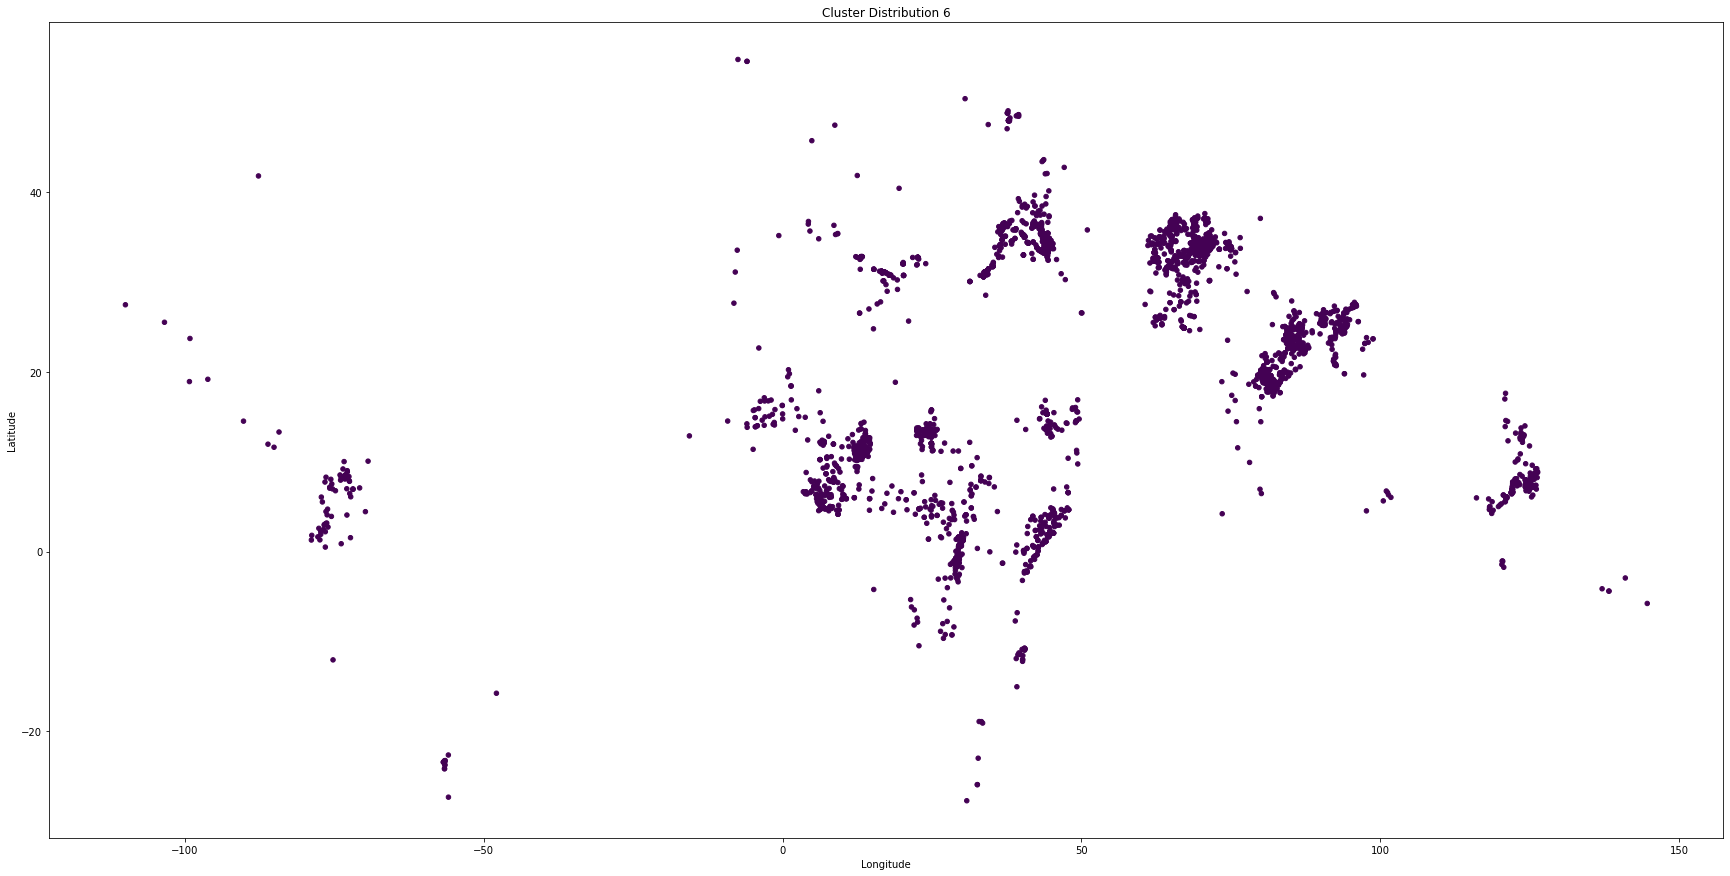

In [137]:
#test3 = combinedDf
test3 = combinedDf[(combinedDf['cluster_predicted'] == 6)]

fig1, ax3 = plt.subplots(figsize=(30,15))
scatter = ax3.scatter(test3['longitude'], test3['latitude'], c=test3['cluster_predicted'], s=20, cmap="viridis")
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
#plt.colorbar(scatter)
ax3.set_title('Cluster Distribution 6')
plt.show()

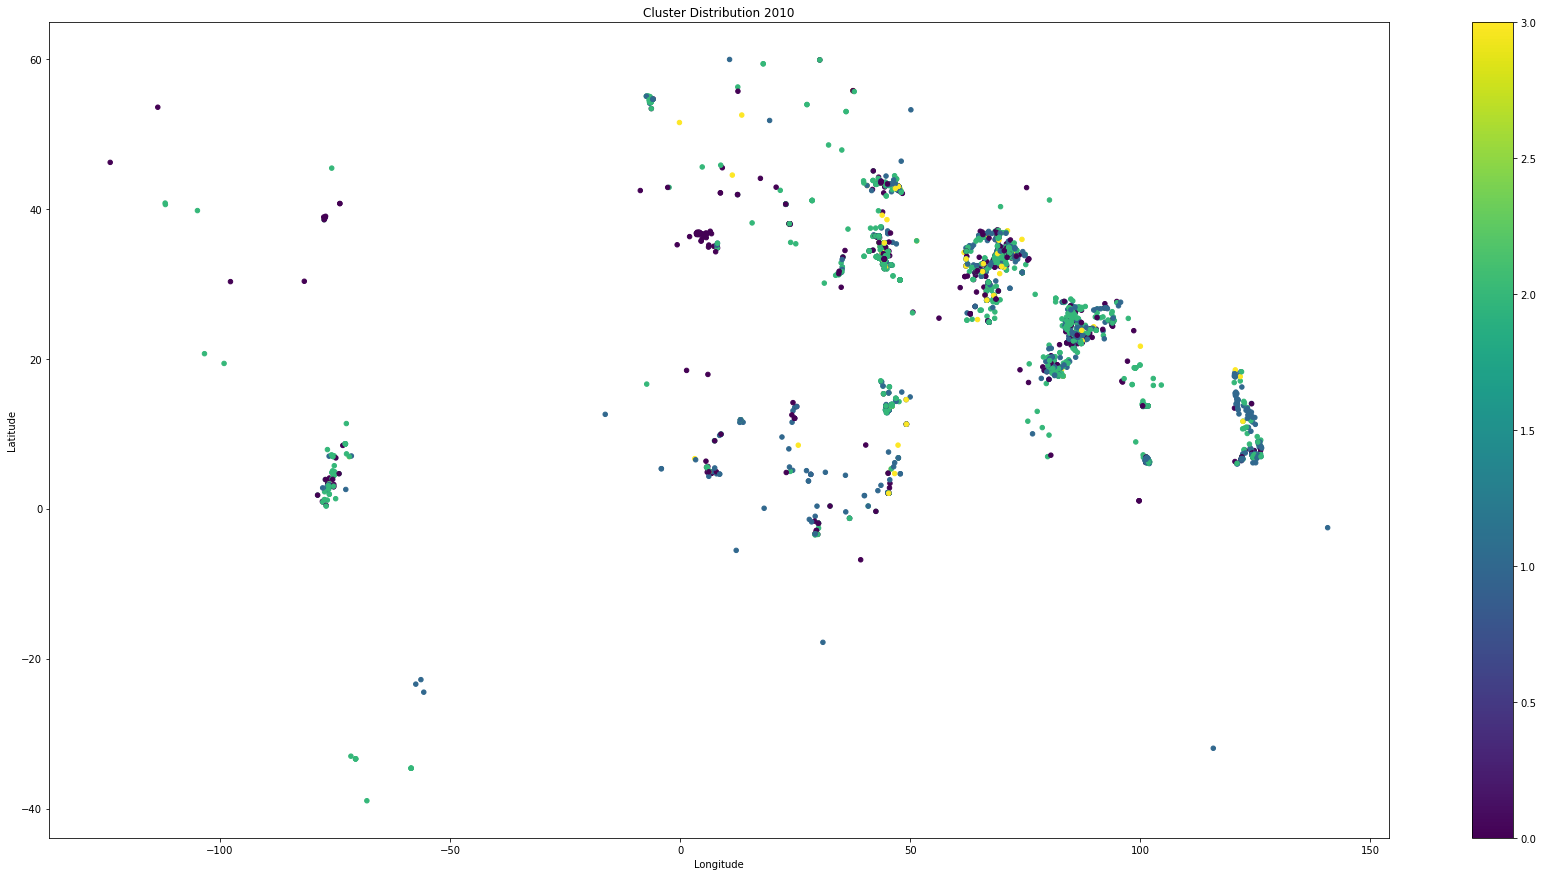

In [49]:
test = combinedDf[combinedDf['iyear'] == 2010]

fig1, ax3 = plt.subplots(figsize=(30,15))
scatter = ax3.scatter(test['longitude'], test['latitude'], c=test['cluster_predicted'], s=20, cmap="viridis")
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
plt.colorbar(scatter)
ax3.set_title('Cluster Distribution 2010')
plt.show()

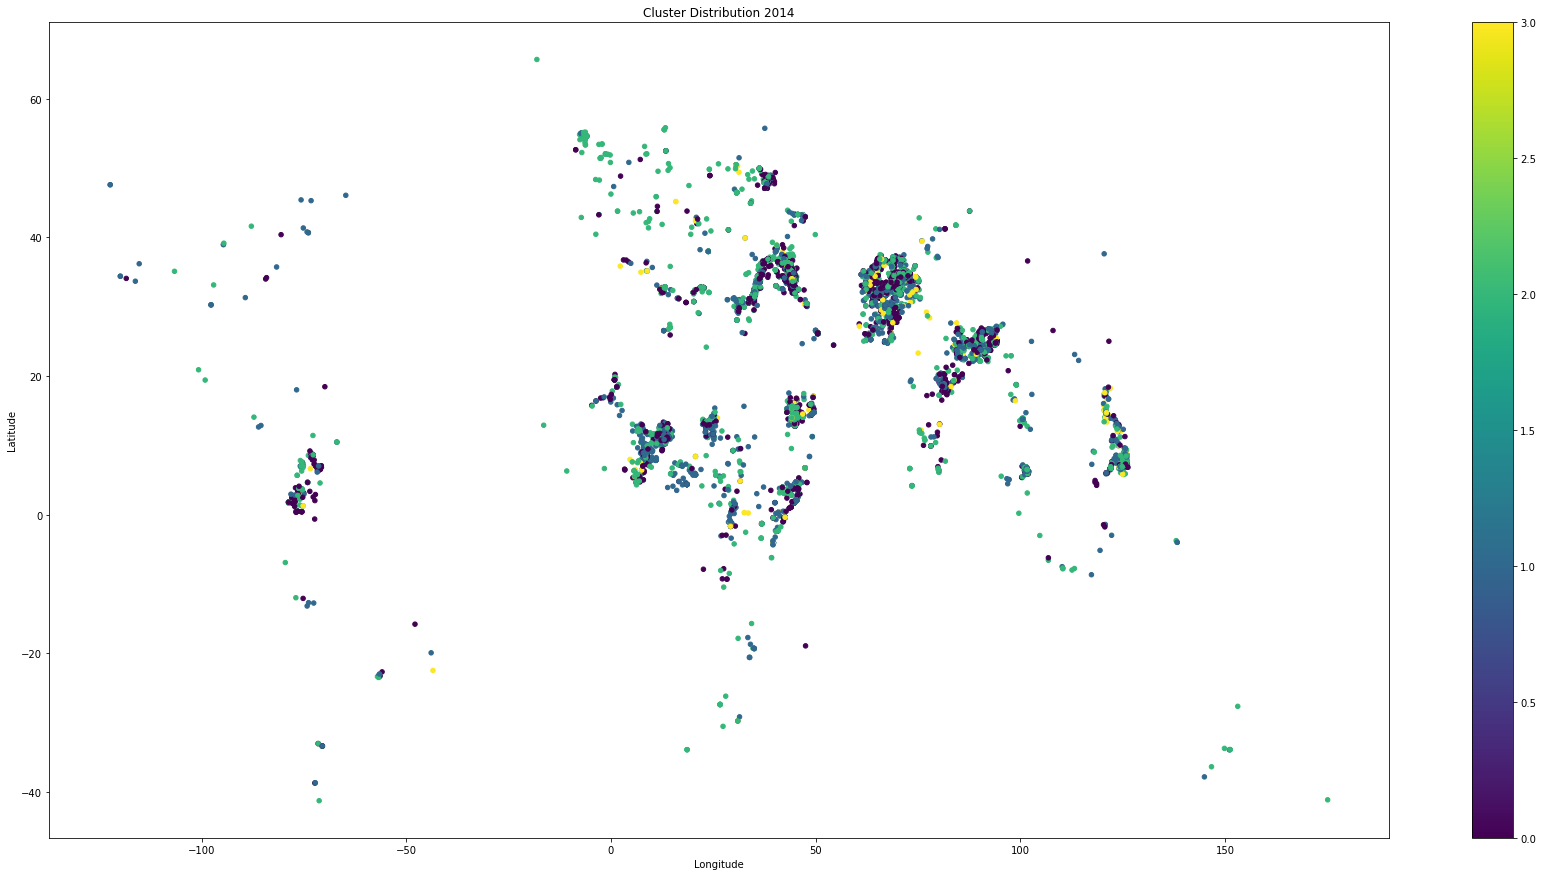

In [50]:
test = combinedDf[combinedDf['iyear'] == 2014]

fig1, ax3 = plt.subplots(figsize=(30,15))
scatter = ax3.scatter(test['longitude'], test['latitude'], c=test['cluster_predicted'], s=20, cmap="viridis")
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
plt.colorbar(scatter)
ax3.set_title('Cluster Distribution 2014')
plt.show()

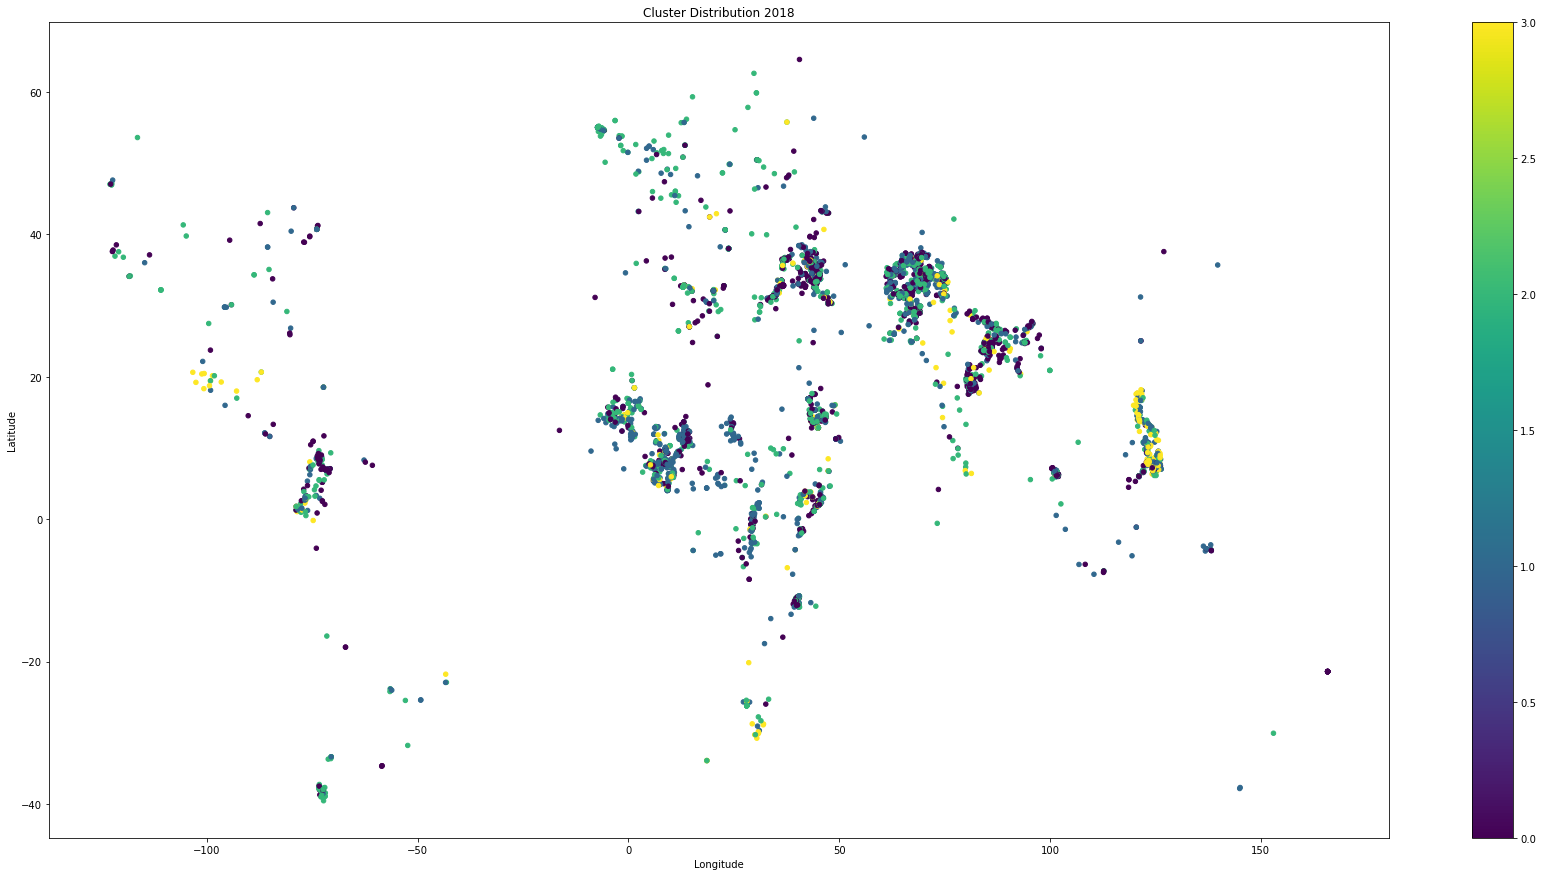

In [51]:
test = combinedDf[combinedDf['iyear'] == 2018]

fig1, ax3 = plt.subplots(figsize=(30,15))
scatter = ax3.scatter(test['longitude'], test['latitude'], c=test['cluster_predicted'], s=20, cmap="viridis")
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
plt.colorbar(scatter)
ax3.set_title('Cluster Distribution 2018')
plt.show()

In [52]:
timeseries = pd.DataFrame(columns = ['iyear', 'nkill', 'nwound', 'nperps', 'prop1Mabove', 'propless1M', 'ishostkid', 'ransompaid'])

In [53]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
timeseries['iyear'] = years

In [54]:
for i in years:
    timeseries.nkill[timeseries['iyear'] == i] = gtd[((gtd['iyear'] == i) & (gtd['nkill'] >= 0))]['nkill'].sum()
    
for i in years:
    timeseries.nwound[timeseries['iyear'] == i] = gtd[((gtd['iyear'] == i) & (gtd['nwound'] >= 0))]['nwound'].sum()
    
for i in years:
    timeseries.nperps[timeseries['iyear'] == i] = gtd[((gtd['iyear'] == i) & (gtd['nperps'] >= 0))]['nperps'].sum()

for i in years:
    timeseries.propless1M[timeseries['iyear'] == i] = gtd[((gtd['iyear'] == i) & (gtd['propextent_txt'] == "Minor (likely < $1 million)"))]['propextent_txt'].count()
    
for i in years:
    timeseries.prop1Mabove[timeseries['iyear'] == i] = gtd[((gtd['iyear'] == i) & (gtd['propextent_txt'] == "Major (likely >= $1 million but < $1 billion)"))]['propextent_txt'].count()
    
for i in years:
    timeseries.ishostkid[timeseries['iyear'] == i] = gtd[((gtd['iyear'] == i) & (gtd['ishostkid'] >= 0))]['ishostkid'].sum()
    
for i in years:
    timeseries.ransompaid[timeseries['iyear'] == i] = gtd[((gtd['iyear'] == i) & (gtd['ransompaid'] >= 0))]['ransompaid'].sum()

In [55]:
timeseries

iyear  nkill nwound nperps prop1Mabove propless1M ishostkid   ransompaid
0   2010   6814  15203  11034           9       2000       432            0
1   2011   7250  13672  12044           3       1974       367  5.42782e+06
2   2012  11027  21645   9221           5       2772       328  1.33458e+06
3   2013  17757  32638  20959           3       3481       590   1.2217e+07
4   2014  31456  33878  33910           6       5073      1324  5.25243e+06
5   2015  26991  36232  27819           0       3530      1180  2.77206e+08
6   2016  23433  33080  24657          12       2773      1140  1.84863e+06
7   2017  16808  18602  17034           4       2344       946  1.58215e+06
8   2018  13340  14437  15052           2       2083       895  2.77039e+07

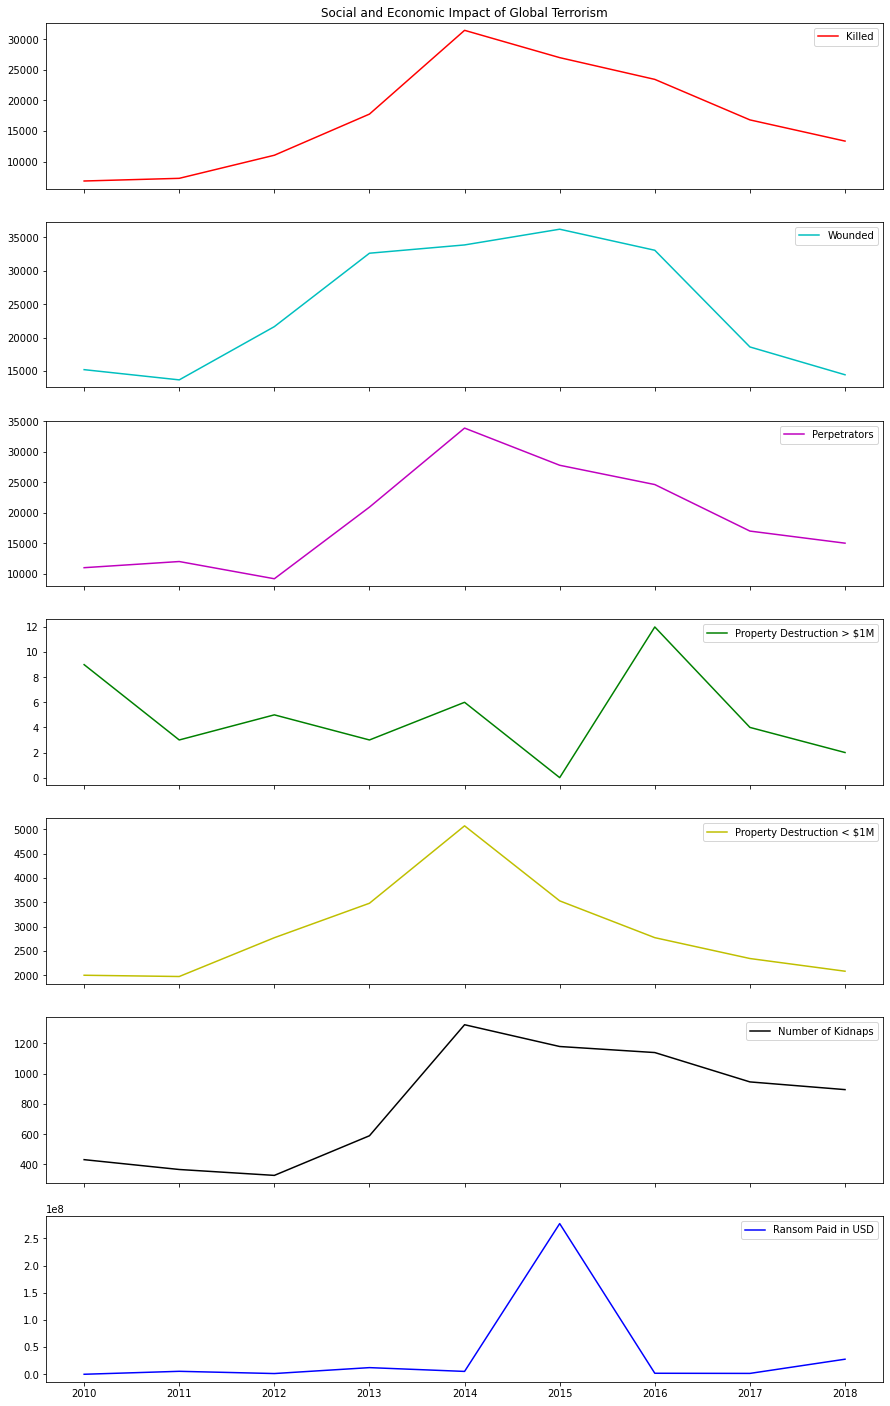

In [56]:
fig, ax = plt.subplots(7, 1, figsize=(15, 25), sharex = True)

legend = ['Killed', 'Wounded', 'Perpetrators', 'Property Destruction > $1M', 'Property Destruction < $1M', 'Number of Kidnaps', 'Ransom Paid']

ax[0].plot(timeseries['iyear'], timeseries['nkill'], 'r')
ax[0].legend(['Killed'])
ax[0].set_title('Social and Economic Impact of Global Terrorism')

ax[1].plot(timeseries['iyear'], timeseries['nwound'], 'c')
ax[1].legend(['Wounded'])

ax[2].plot(timeseries['iyear'], timeseries['nperps'], 'm')
ax[2].legend(['Perpetrators'])

ax[3].plot(timeseries['iyear'], timeseries['prop1Mabove'], 'g')
ax[3].legend(['Property Destruction > $1M'])

ax[4].plot(timeseries['iyear'], timeseries['propless1M'], 'y')
ax[4].legend(['Property Destruction < $1M'])

ax[5].plot(timeseries['iyear'], timeseries['ishostkid'], 'k')
ax[5].legend(['Number of Kidnaps'])

ax[6].plot(timeseries['iyear'], timeseries['ransompaid'], 'b')
ax[6].legend(['Ransom Paid in USD'])

plt.show()

In [57]:
import squarify

In [58]:
terr_grp1_data = gtd[gtd['guncertain1'] == 1]
terr_grp2_data = gtd[gtd['guncertain2'] == 1]
terr_grp3_data = gtd[gtd['guncertain3'] == 1]

In [59]:
isnull = terr_grp1_data.isnull().sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(isnull)

eventid                  0
iyear                    0
imonth                   0
iday                     0
extended                 0
country_txt              0
provstate                0
city                    18
latitude                 0
longitude                0
summary                  0
crit1                    0
crit2                    0
crit3                    0
multiple                 0
success                  0
suicide                  0
attacktype1              0
attacktype1_txt          0
attacktype2           5108
attacktype2_txt       5108
attacktype3           5591
attacktype3_txt       5591
targtype1                0
targtype1_txt            0
natlty1                 20
natlty1_txt             20
targtype2             5093
targtype2_txt         5093
natlty2               5097
natlty2_txt           5097
targtype3             5575
targtype3_txt         5575
natlty3               5576
natlty3_txt           5576
gname                    0
gname2                5433
g

In [60]:
terr_grp1_data = terr_grp1_data.dropna(subset=['nkill', 'nwound'])

In [61]:
from collections import Counter

In [62]:
terrgrp_count = Counter(terr_grp1_data['gname'])
fig_terrgrp = pd.DataFrame.from_dict(terrgrp_count, orient='index')

In [63]:
terr_grp1_names = list(fig_terrgrp.index)
terr_grp1_incidents = list(fig_terrgrp[0])

In [64]:
terr_grp1_data_map = pd.DataFrame(terr_grp1_names, columns = ['gname'])
terr_grp1_data_map['incidents'] = terr_grp1_incidents
terr_grp1_data_map = terr_grp1_data_map.sort_values('incidents', ascending=False)

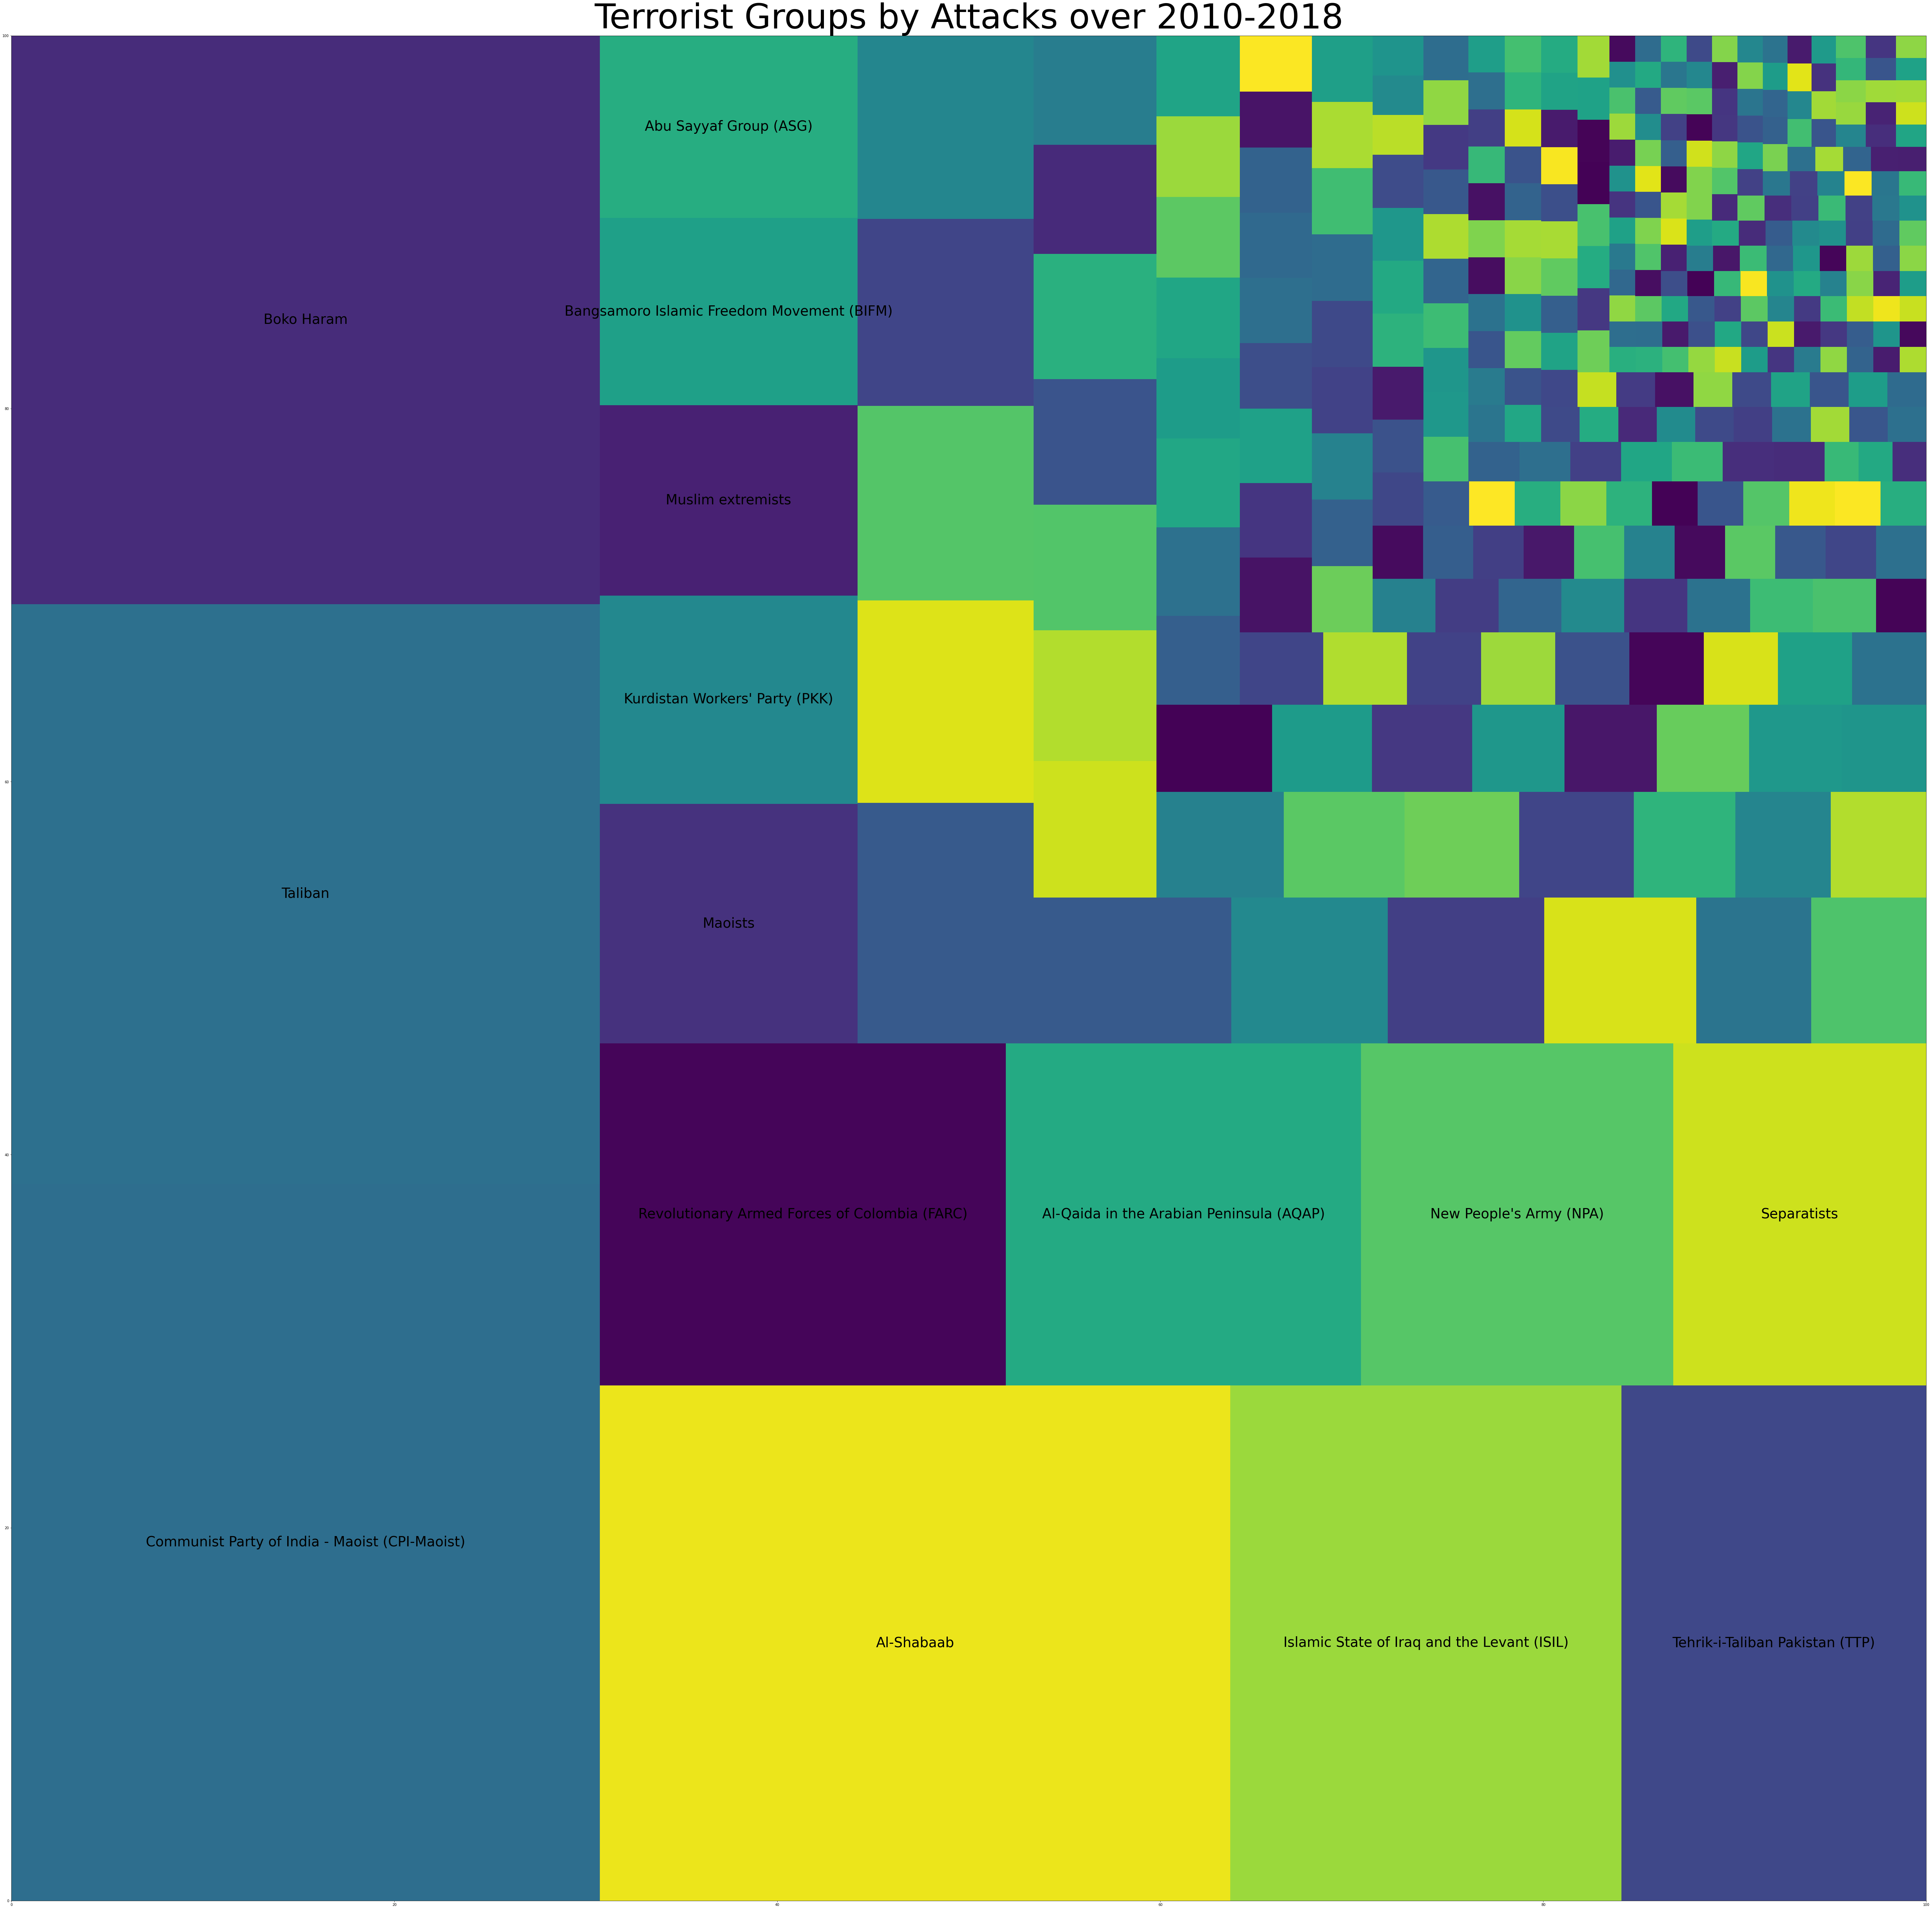

In [65]:
fig, ax = plt.subplots(figsize=(100,100))
sizes=terr_grp1_data_map['incidents']
label=terr_grp1_data_map['gname'][0:15]
ax.set_title('Terrorist Groups by Attacks over 2010-2018', fontsize = 100)
squarify.plot(sizes=sizes, label=label, text_kwargs={'fontsize':40, 'wrap':True})
plt.show()

In [66]:
terr_grp1_data_map['gname'][0:15]

3      Communist Party of India - Maoist (CPI-Maoist)
1                                             Taliban
93                                         Boko Haram
13                                         Al-Shabaab
209       Islamic State of Iraq and the Levant (ISIL)
0                     Tehrik-i-Taliban Pakistan (TTP)
2       Revolutionary Armed Forces of Colombia (FARC)
62           Al-Qaida in the Arabian Peninsula (AQAP)
18                            New People's Army (NPA)
154                                       Separatists
146                                           Maoists
56                     Kurdistan Workers' Party (PKK)
160                                 Muslim extremists
180        Bangsamoro Islamic Freedom Movement (BIFM)
7                              Abu Sayyaf Group (ASG)
Name: gname, dtype: object

In [67]:
terr_grp1_data[((terr_grp1_data['gname'] == "Communist Party of India - Maoist (CPI-Maoist)") & (terr_grp1_data['nkill'] >= 0))]['nkill'].sum()

499.0

In [68]:
terr_grp1_data_map['nkill'] = 0
terr_grp1_data_map['nwound'] = 0
terr_grp1_data_map['propdamage'] = 0
terr_grp1_data_map['ishostkid'] = 0

In [69]:
for i in terr_grp1_names:
    terr_grp1_data_map.nkill[terr_grp1_data_map['gname'] == i] = terr_grp1_data[((terr_grp1_data['gname'] == i) & (terr_grp1_data['nkill'] >= 0))]['nkill'].sum()
    
for i in terr_grp1_names:
    terr_grp1_data_map.nwound[terr_grp1_data_map['gname'] == i] = terr_grp1_data[((terr_grp1_data['gname'] == i) & (terr_grp1_data['nwound'] >= 0))]['nwound'].sum()
    
for i in terr_grp1_names:
    terr_grp1_data_map.propdamage[terr_grp1_data_map['gname'] == i] = terr_grp1_data[((terr_grp1_data['gname'] == i) & (terr_grp1_data['propextent_txt'] == "Minor (likely < $1 million)"))]['propextent_txt'].count()
    
for i in terr_grp1_names:
    terr_grp1_data_map.ishostkid[terr_grp1_data_map['gname'] == i] = terr_grp1_data[((terr_grp1_data['gname'] == i) & (terr_grp1_data['ishostkid'] >= 0))]['ishostkid'].sum()

In [70]:
terr_grp1_data_map['casualties'] = terr_grp1_data_map['nkill'] + terr_grp1_data_map['nwound']
terr_grp1_data_map

gname  incidents  nkill  \
3       Communist Party of India - Maoist (CPI-Maoist)        628    499   
1                                              Taliban        508   1389   
93                                          Boko Haram        498   1635   
13                                          Al-Shabaab        484    591   
209        Islamic State of Iraq and the Levant (ISIL)        300   1261   
..                                                 ...        ...    ...   
203                           Bedouin Movement (Sudan)          1      0   
204                         Southern Yemen Separatists          1      0   
206                             February 14th Movement          1      0   
208                                           Al-Ummah          1      0   
361  People's Revolutionary Party of Kangleipak-Pro...          1      0   

     nwound  propdamage  ishostkid  casualties  
3       423         250        106         922  
1      2916         174         96        4305  
93     1536         175          7        3171  
13     1084         141         62        1675  
209    3220          84          2        4481  
..      ...         ...        ...         ...  
203       0           0          0           0  
204       5           1          0           5  
206       1           0          0           1  
208      16           0          0          16  
361       0           1          0           0  

[362 rows x 7 columns]

In [71]:
test = terr_grp1_data_map[(terr_grp1_data_map['casualties'] > 0)]
test = test.sort_values('casualties', ascending=False)

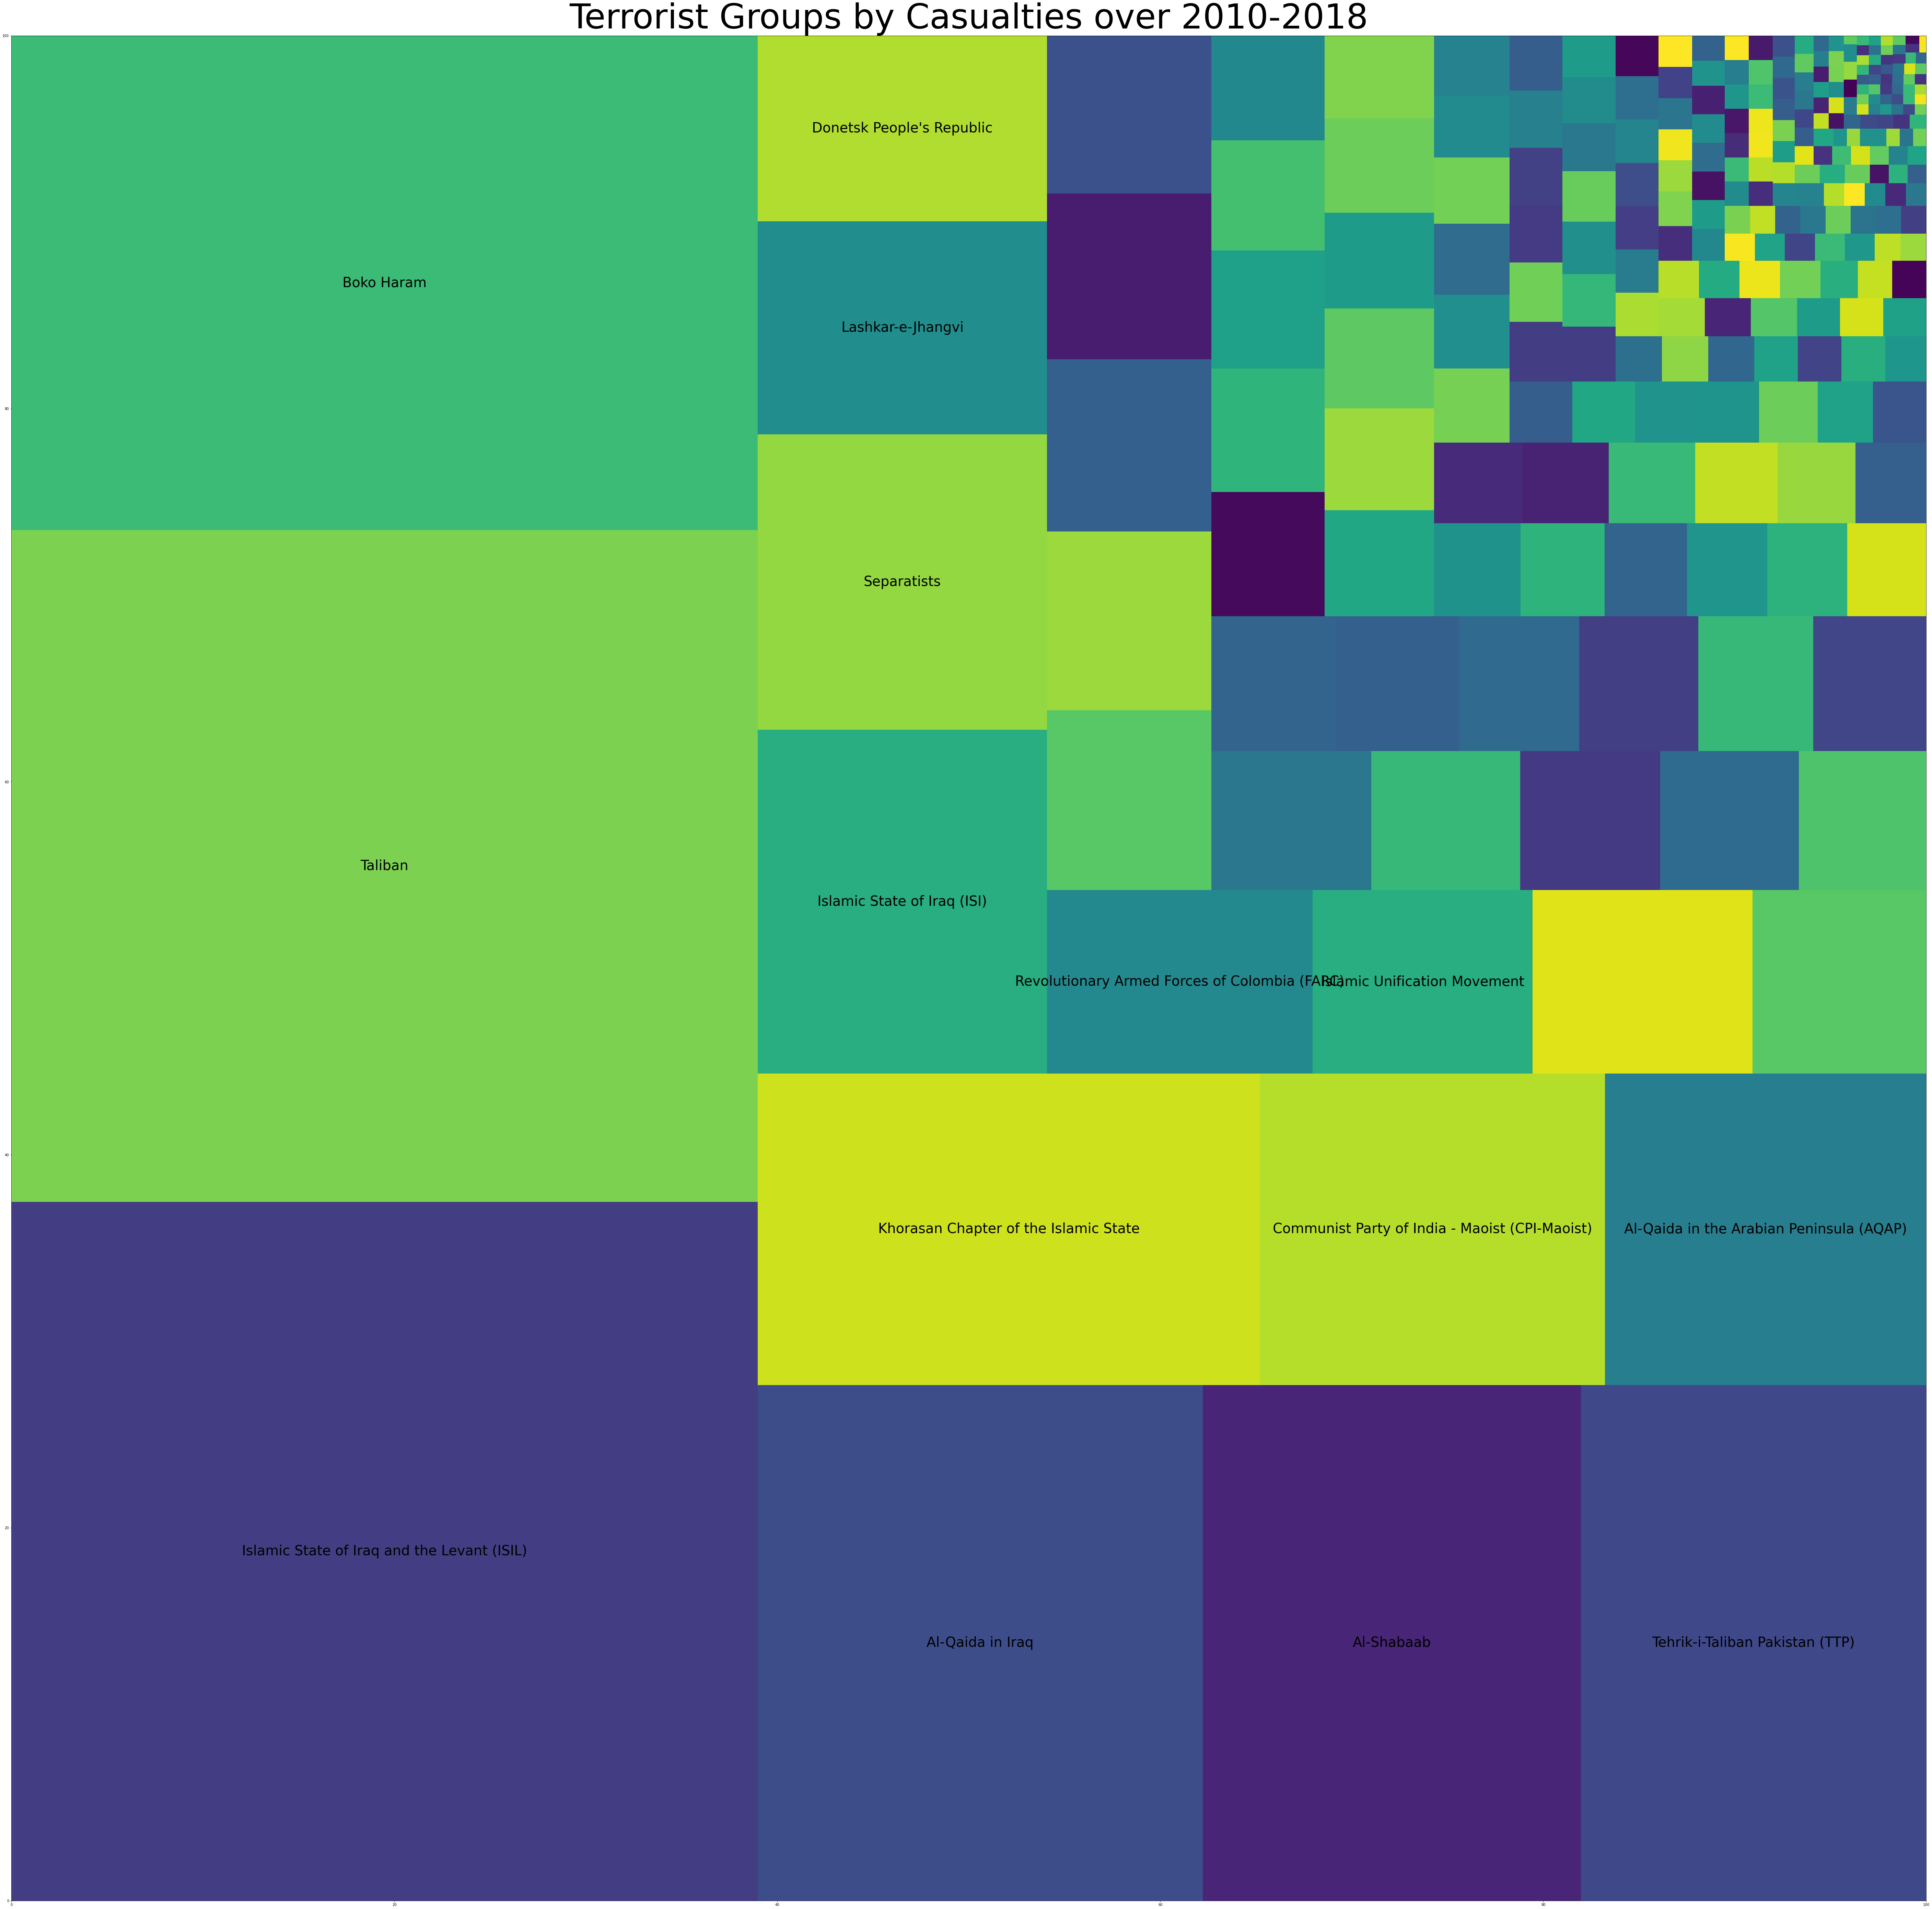

In [72]:
fig, ax = plt.subplots(figsize=(100,100))
sizes=test['casualties']
label=test['gname'][0:15]
ax.set_title('Terrorist Groups by Casualties over 2010-2018', fontsize = 100)
squarify.plot(sizes=sizes, label=label, text_kwargs={'fontsize':40, 'wrap':True})
plt.show()

In [73]:
test = terr_grp1_data_map[(terr_grp1_data_map['propdamage'] > 0)]
test = test.sort_values('propdamage', ascending=False)

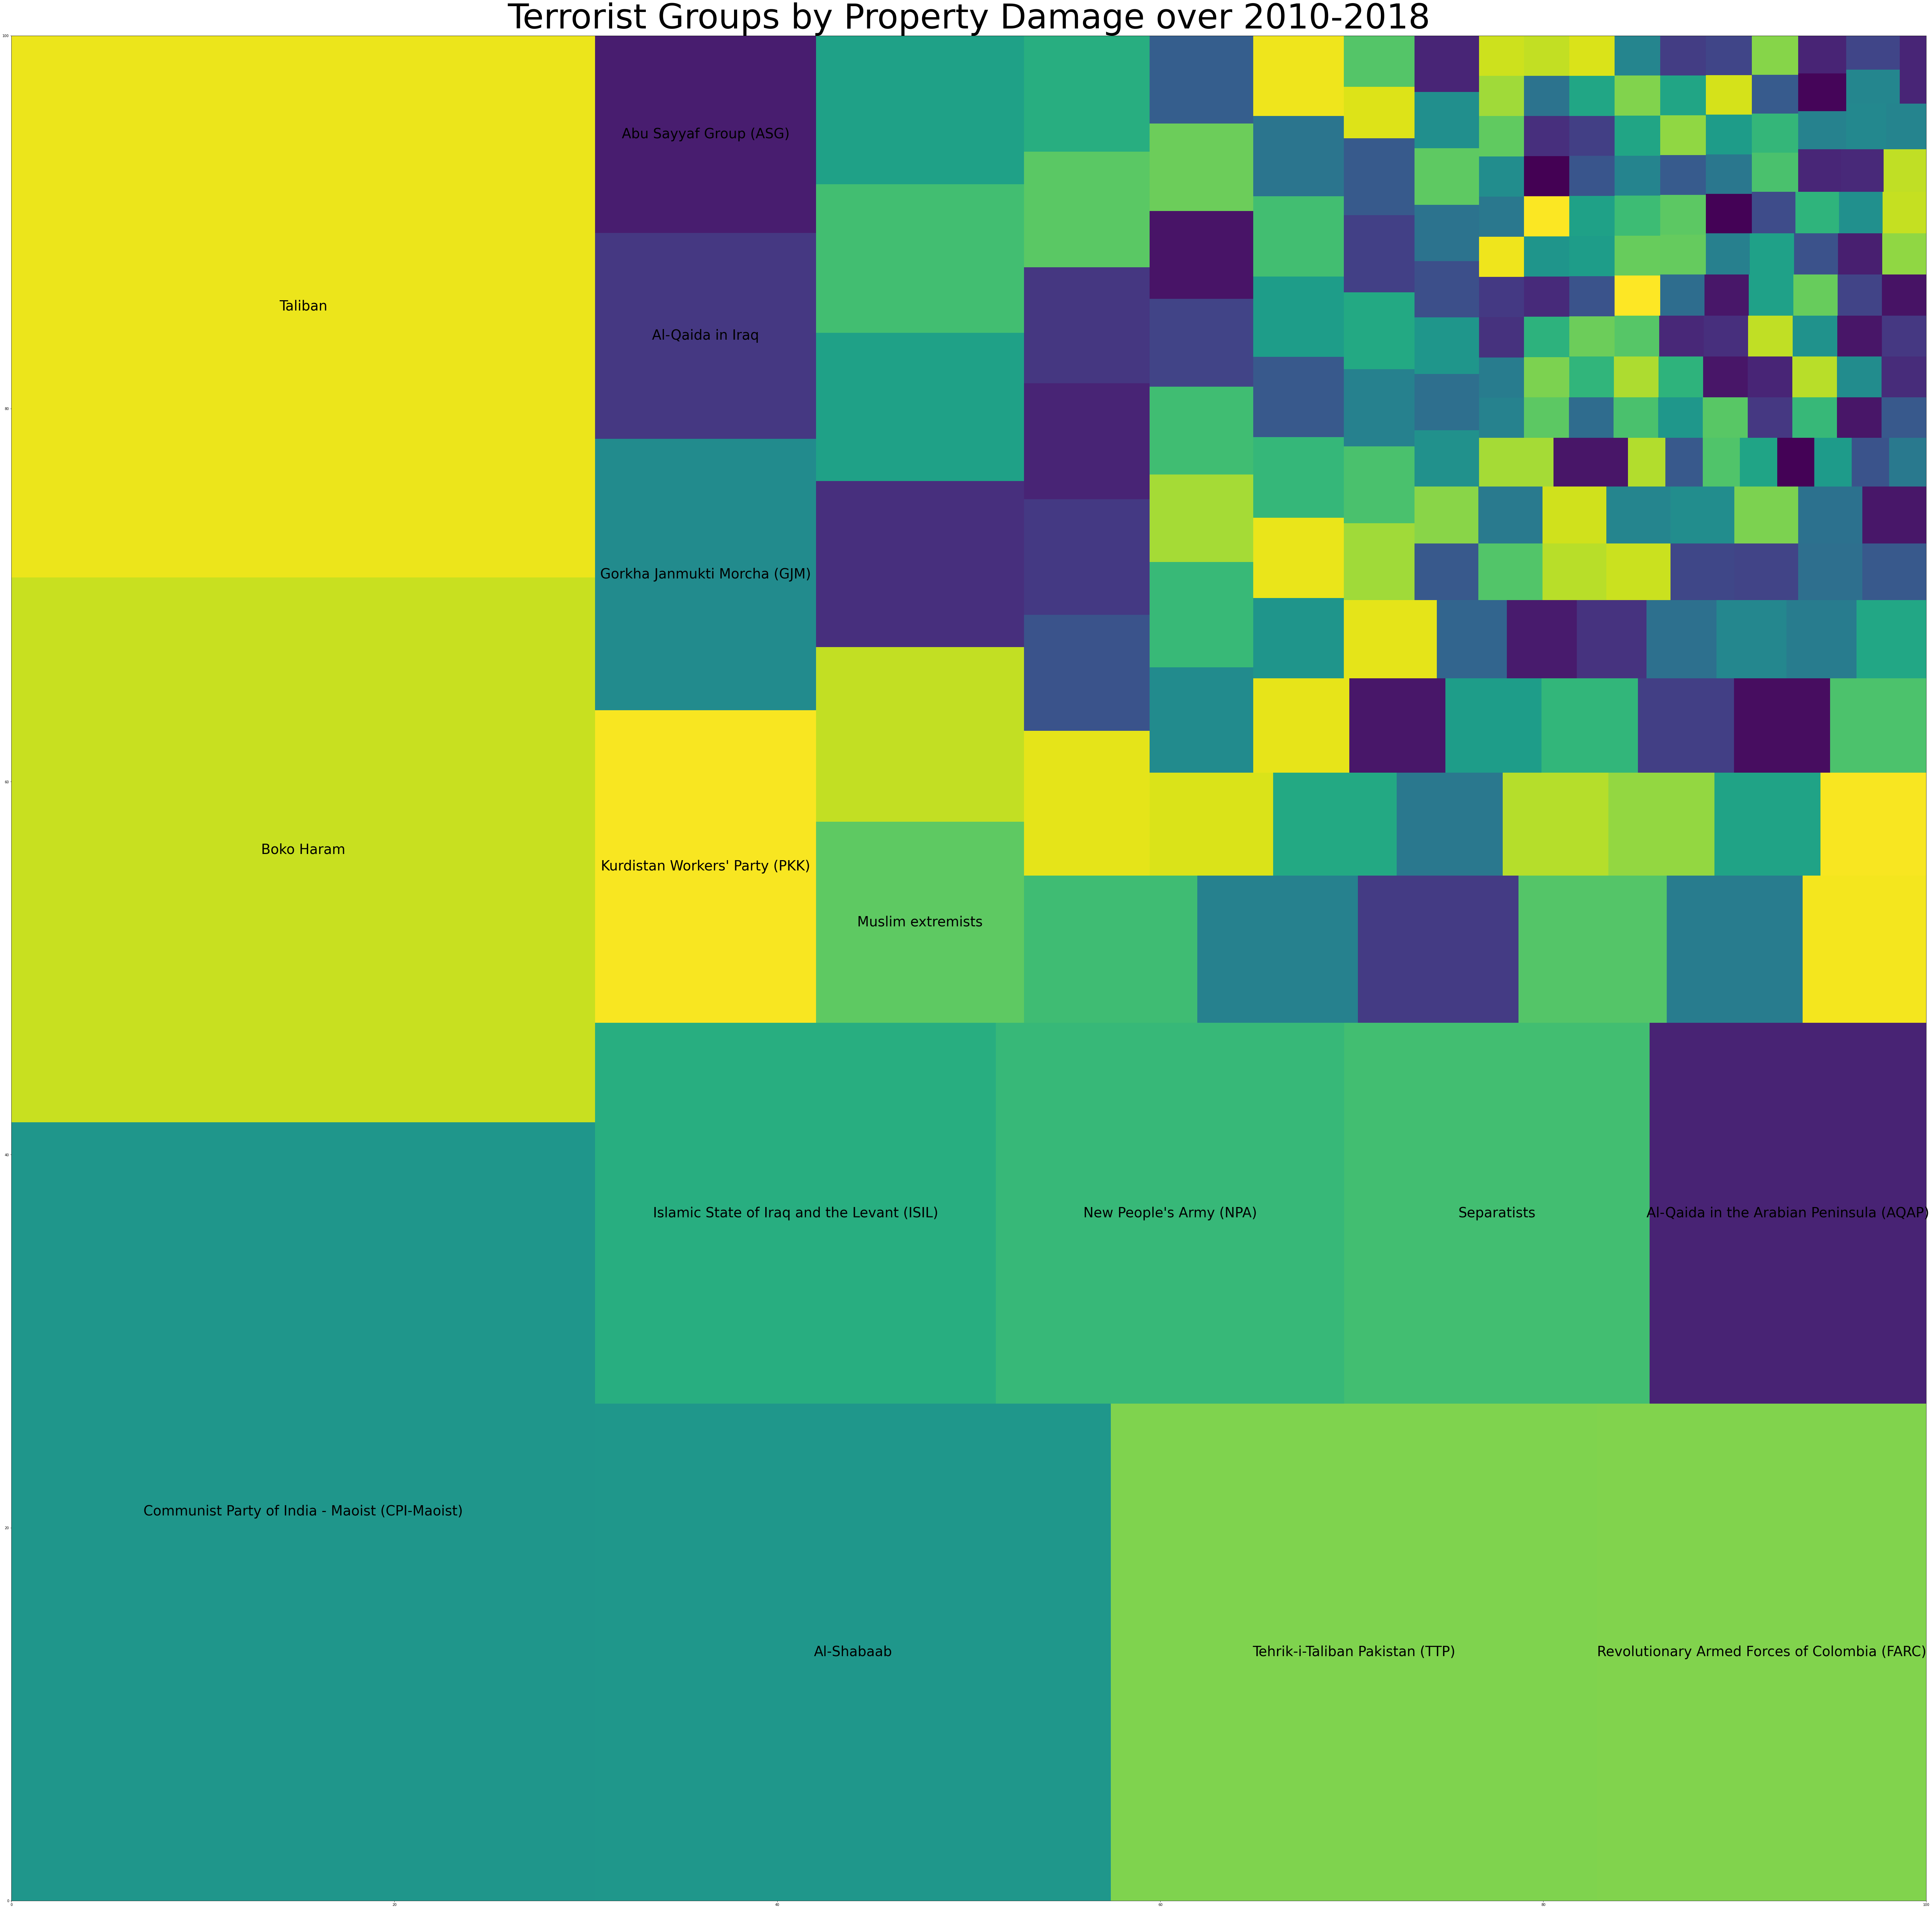

In [74]:
fig, ax = plt.subplots(figsize=(100,100))
sizes=test['propdamage']
label=test['gname'][0:15]
ax.set_title('Terrorist Groups by Property Damage over 2010-2018', fontsize = 100)
squarify.plot(sizes=sizes, label=label, text_kwargs={'fontsize':40, 'wrap':True})
plt.show()

In [75]:
test = terr_grp1_data_map[(terr_grp1_data_map['ishostkid'] > 0)]
test = test.sort_values('ishostkid', ascending=False)

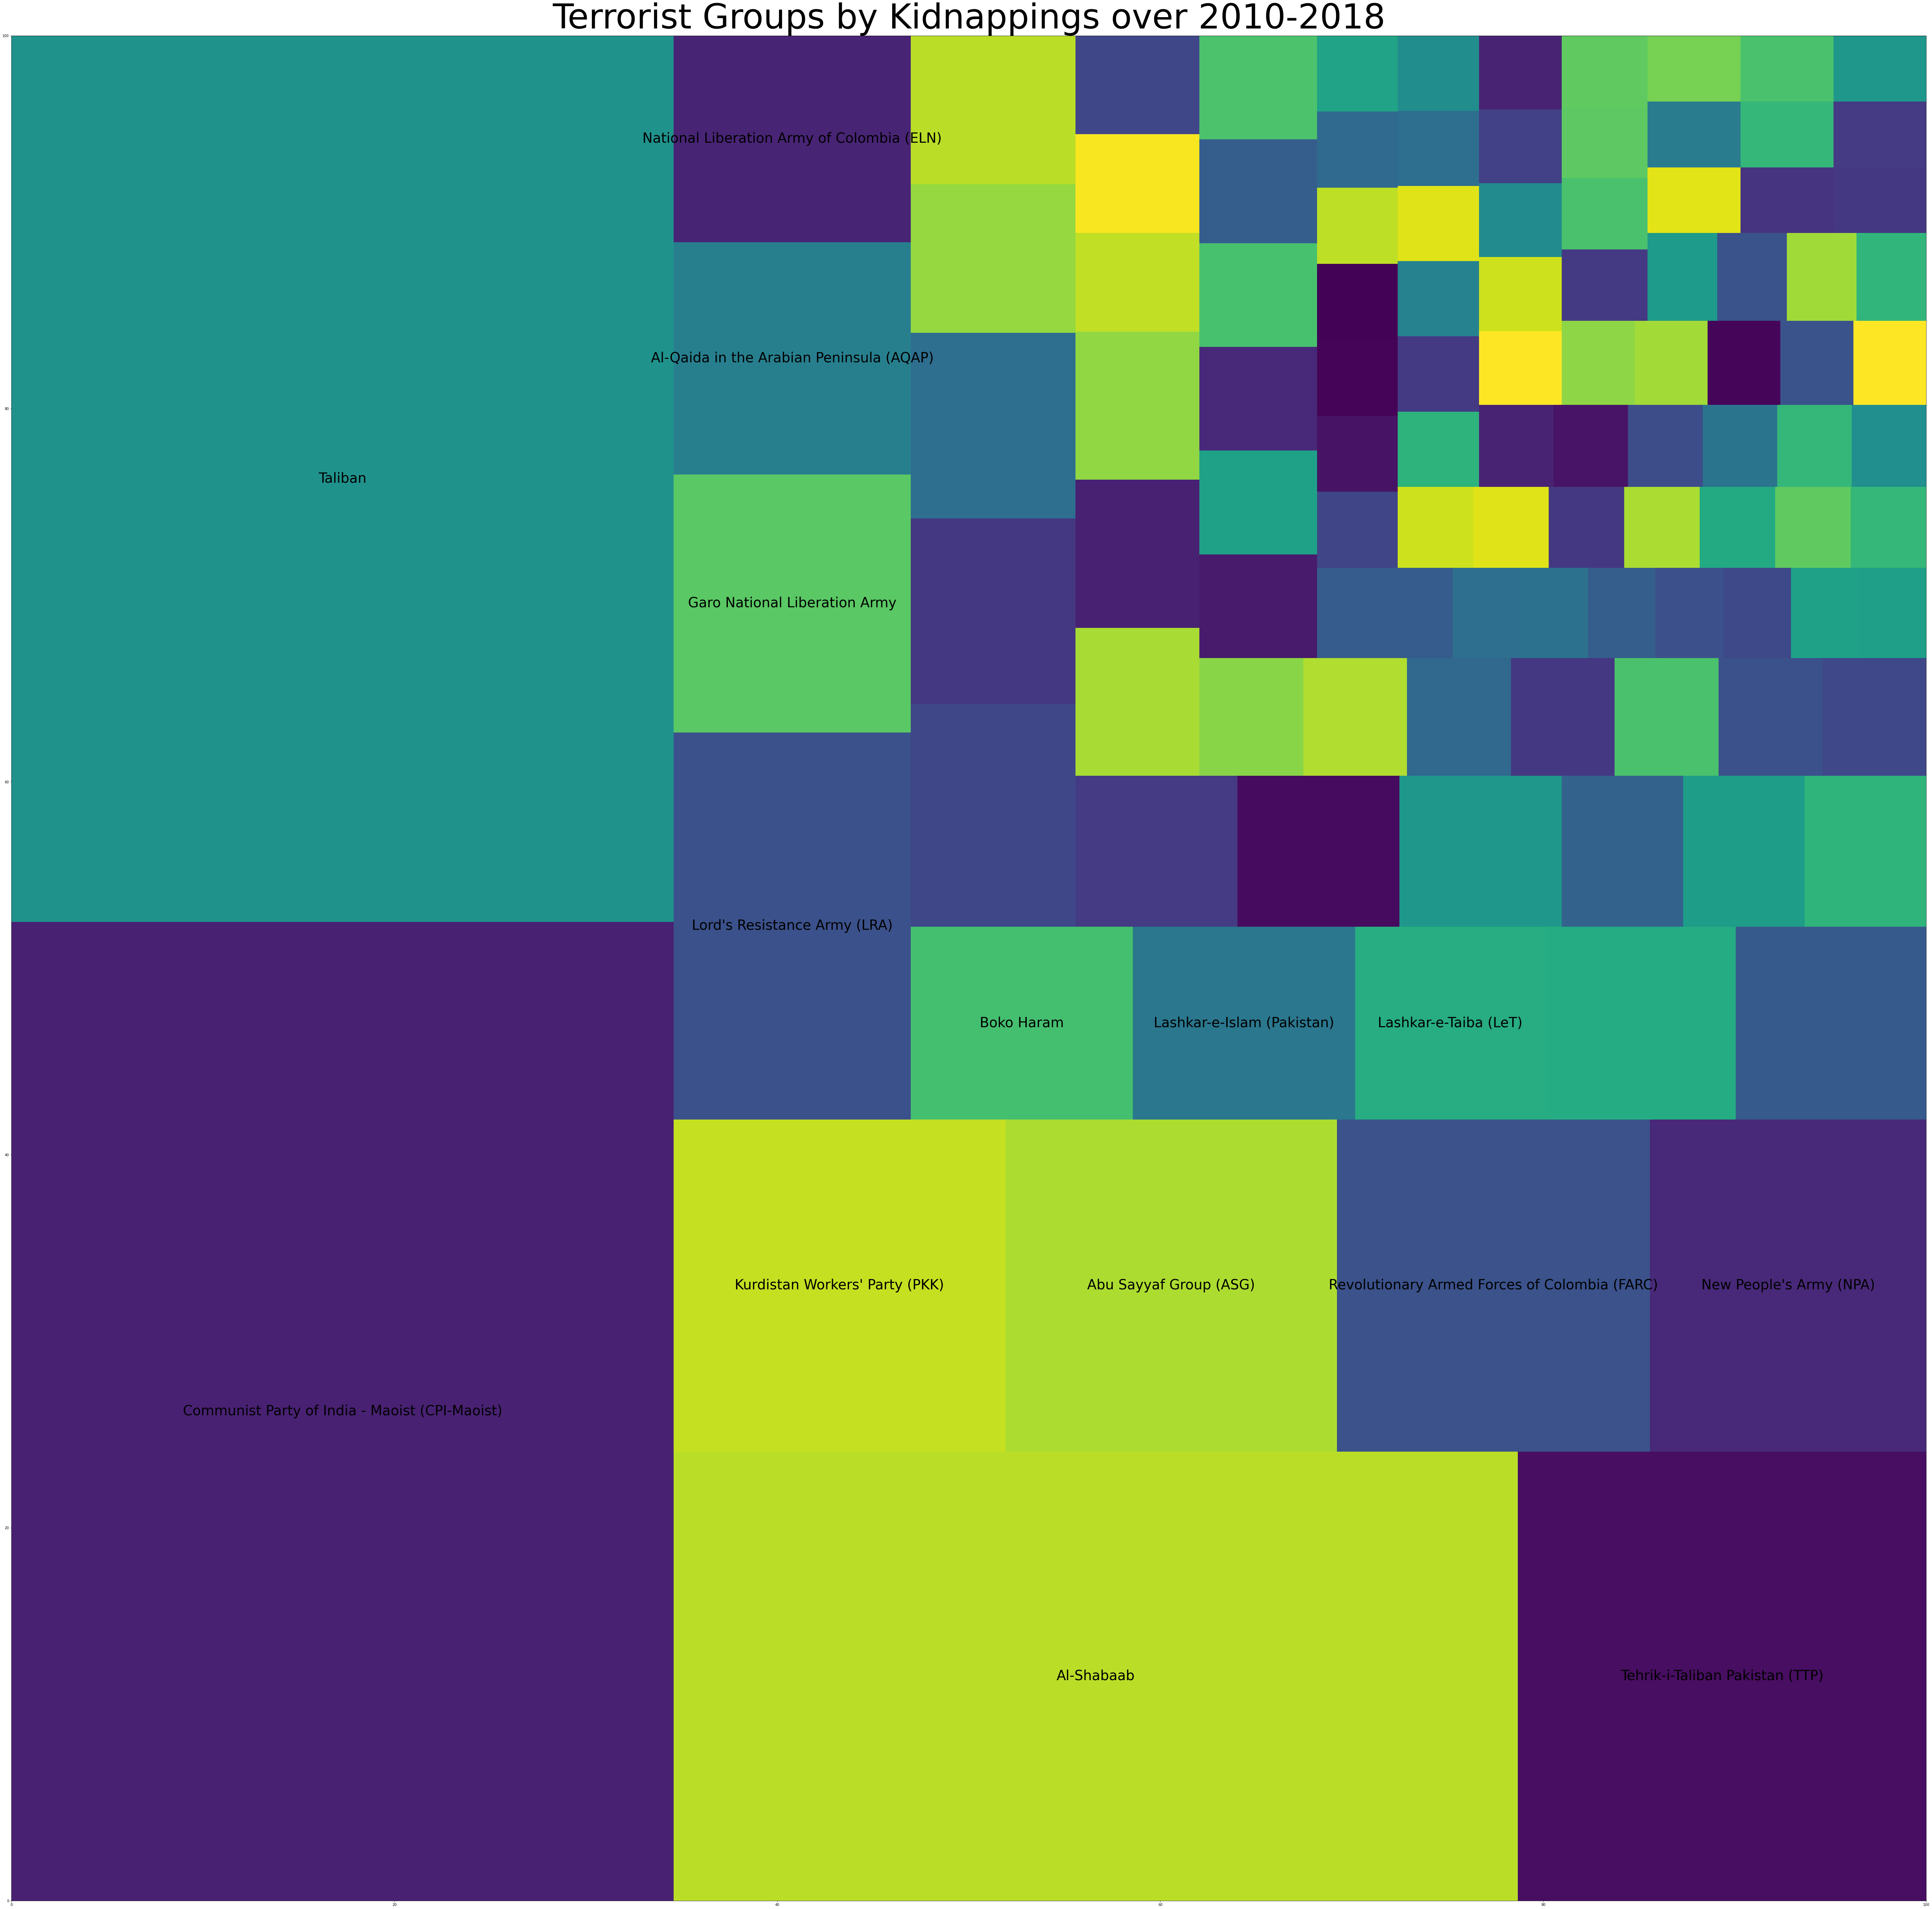

In [76]:
fig, ax = plt.subplots(figsize=(100,100))
sizes=test['ishostkid']
label=test['gname'][0:15]
ax.set_title('Terrorist Groups by Kidnappings over 2010-2018', fontsize = 100)
squarify.plot(sizes=sizes, label=label, text_kwargs={'fontsize':40, 'wrap':True})
plt.show()

In [77]:
terr_grp1_2010 = terr_grp1_data[terr_grp1_data['iyear'] == 2010]
terr_grp1_2014 = terr_grp1_data[terr_grp1_data['iyear'] == 2014]
terr_grp1_2018 = terr_grp1_data[terr_grp1_data['iyear'] == 2018]

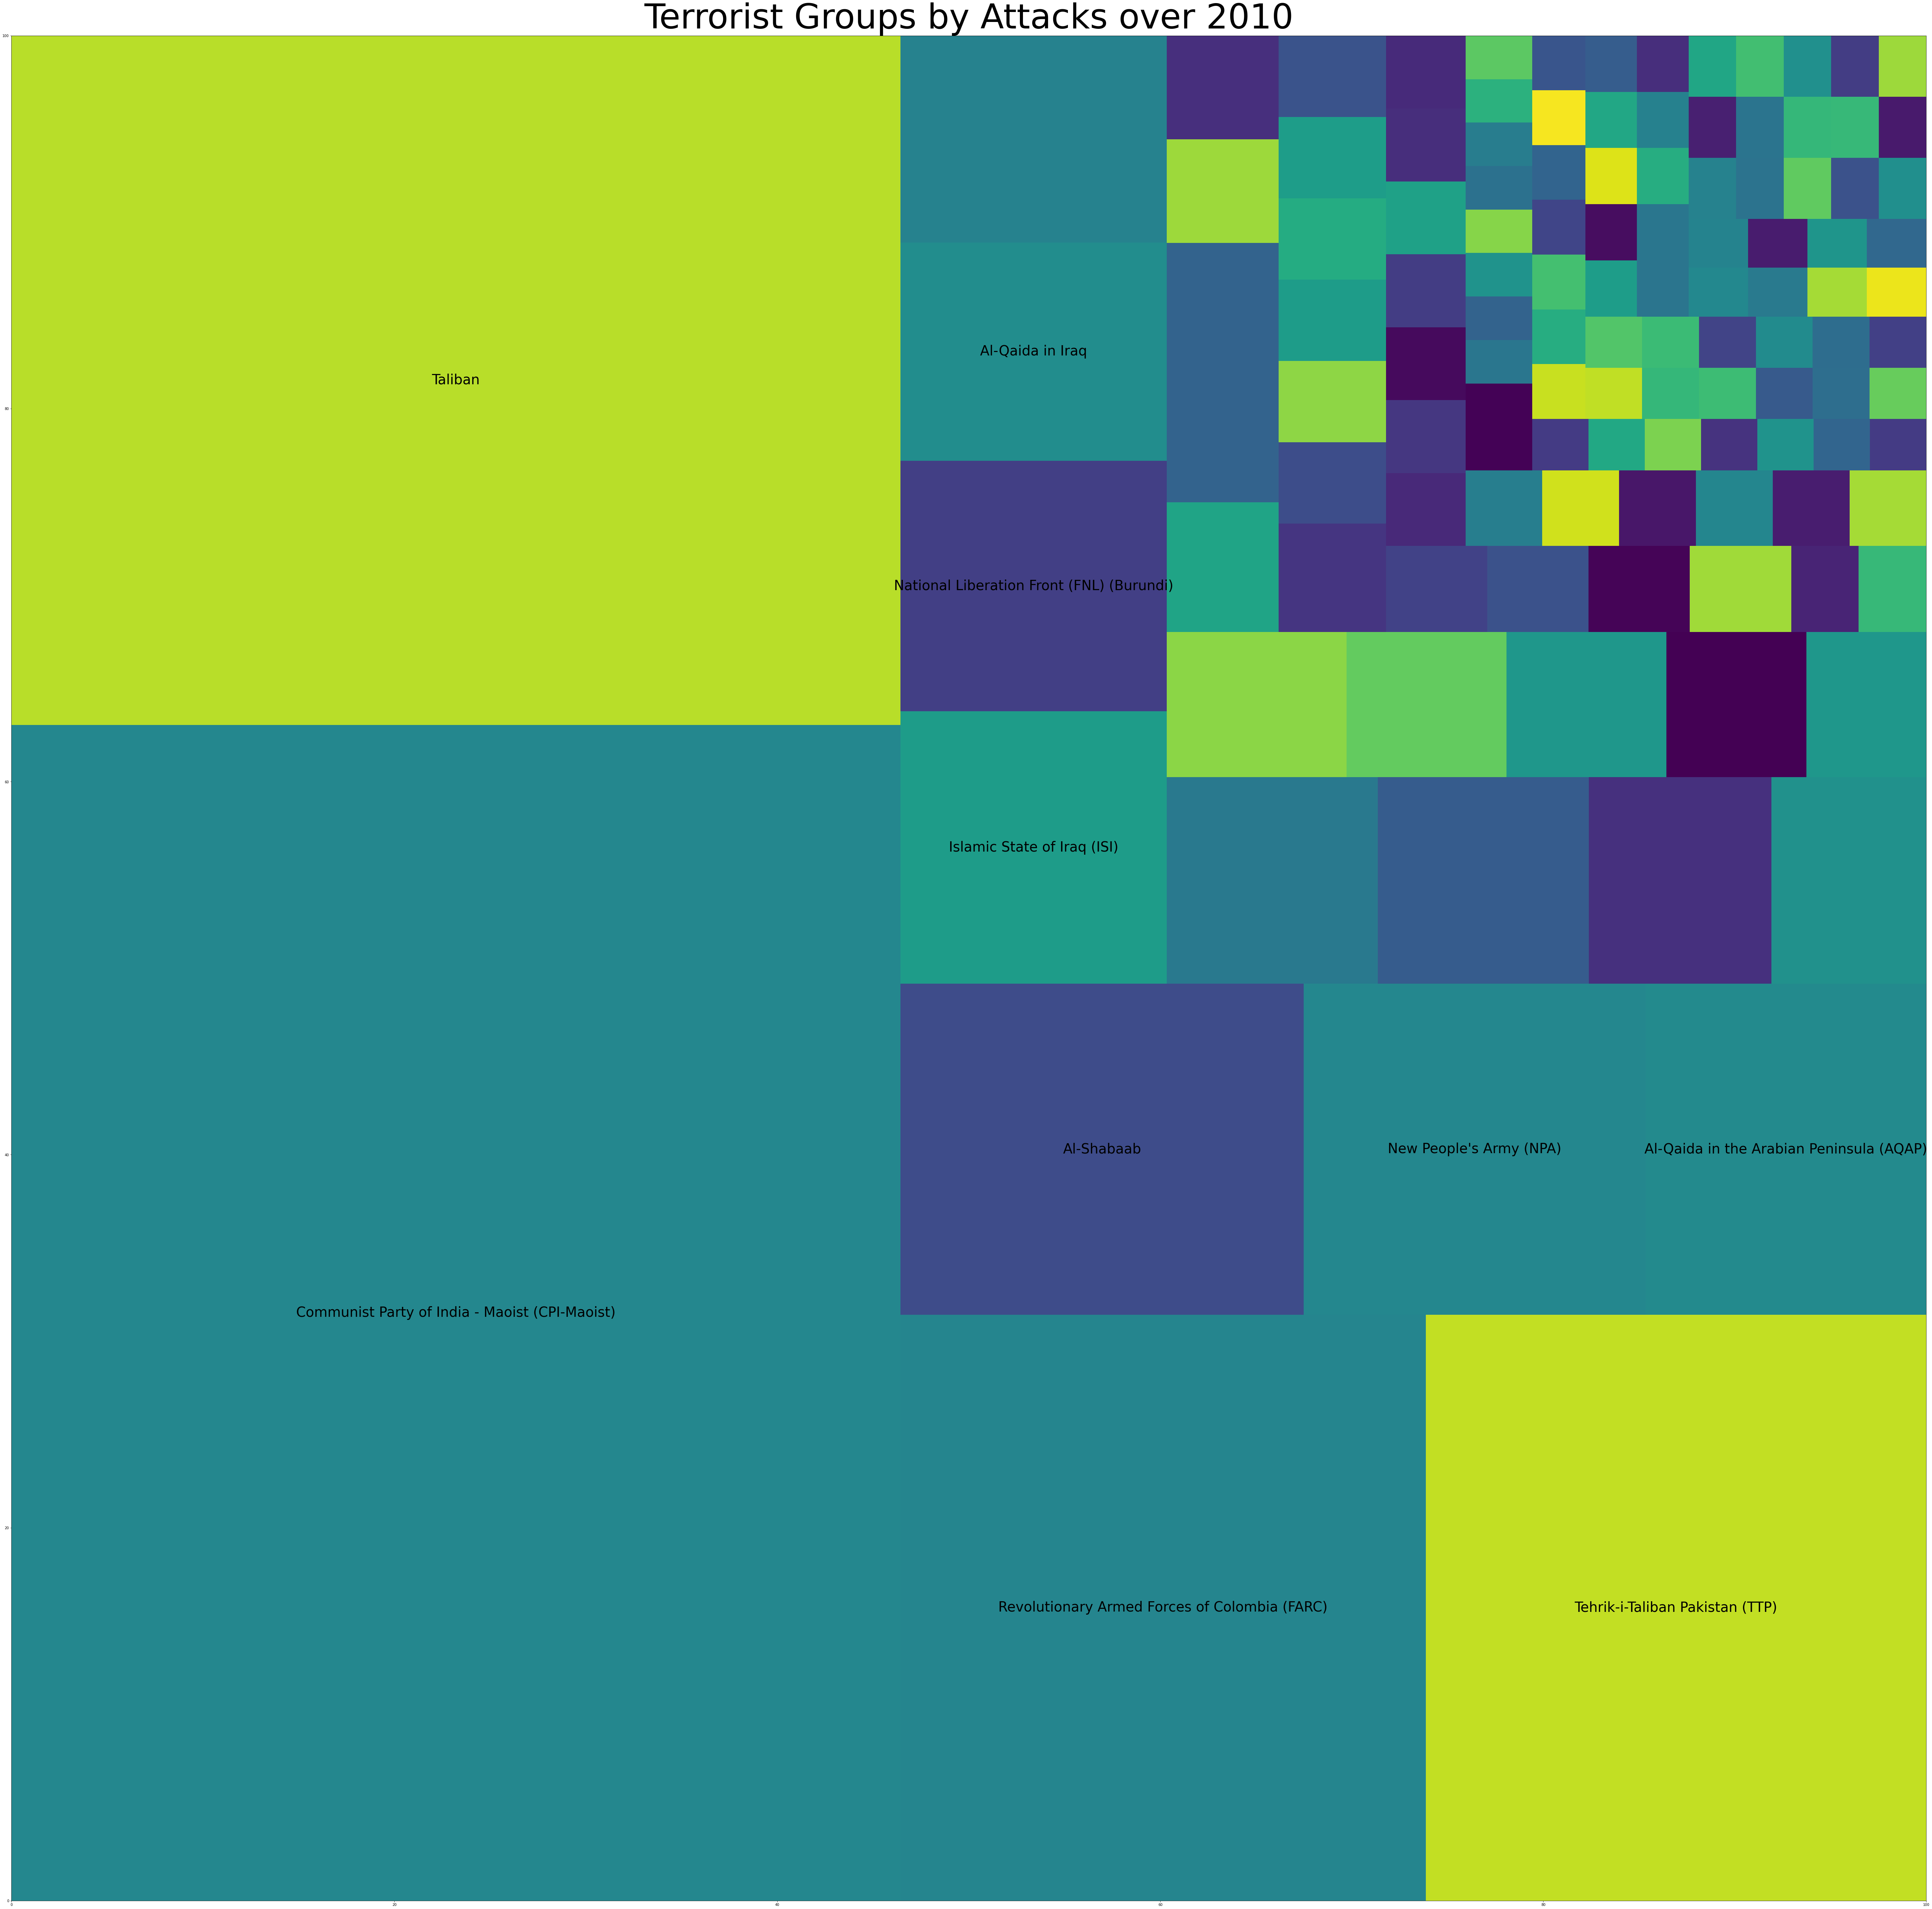

In [78]:
terrgrp_count = Counter(terr_grp1_2010['gname'])
fig_terrgrp = pd.DataFrame.from_dict(terrgrp_count, orient='index')

terr_grp1_names = list(fig_terrgrp.index)
terr_grp1_incidents = list(fig_terrgrp[0])

test = pd.DataFrame(terr_grp1_names, columns = ['gname'])
test['incidents'] = terr_grp1_incidents
test = test.sort_values('incidents', ascending=False)

fig, ax = plt.subplots(figsize=(100,100))
sizes=test['incidents']
label=test['gname'][0:10]
ax.set_title('Terrorist Groups by Attacks over 2010', fontsize = 100)
squarify.plot(sizes=sizes, label=label, text_kwargs={'fontsize':40, 'wrap':True})
plt.show()

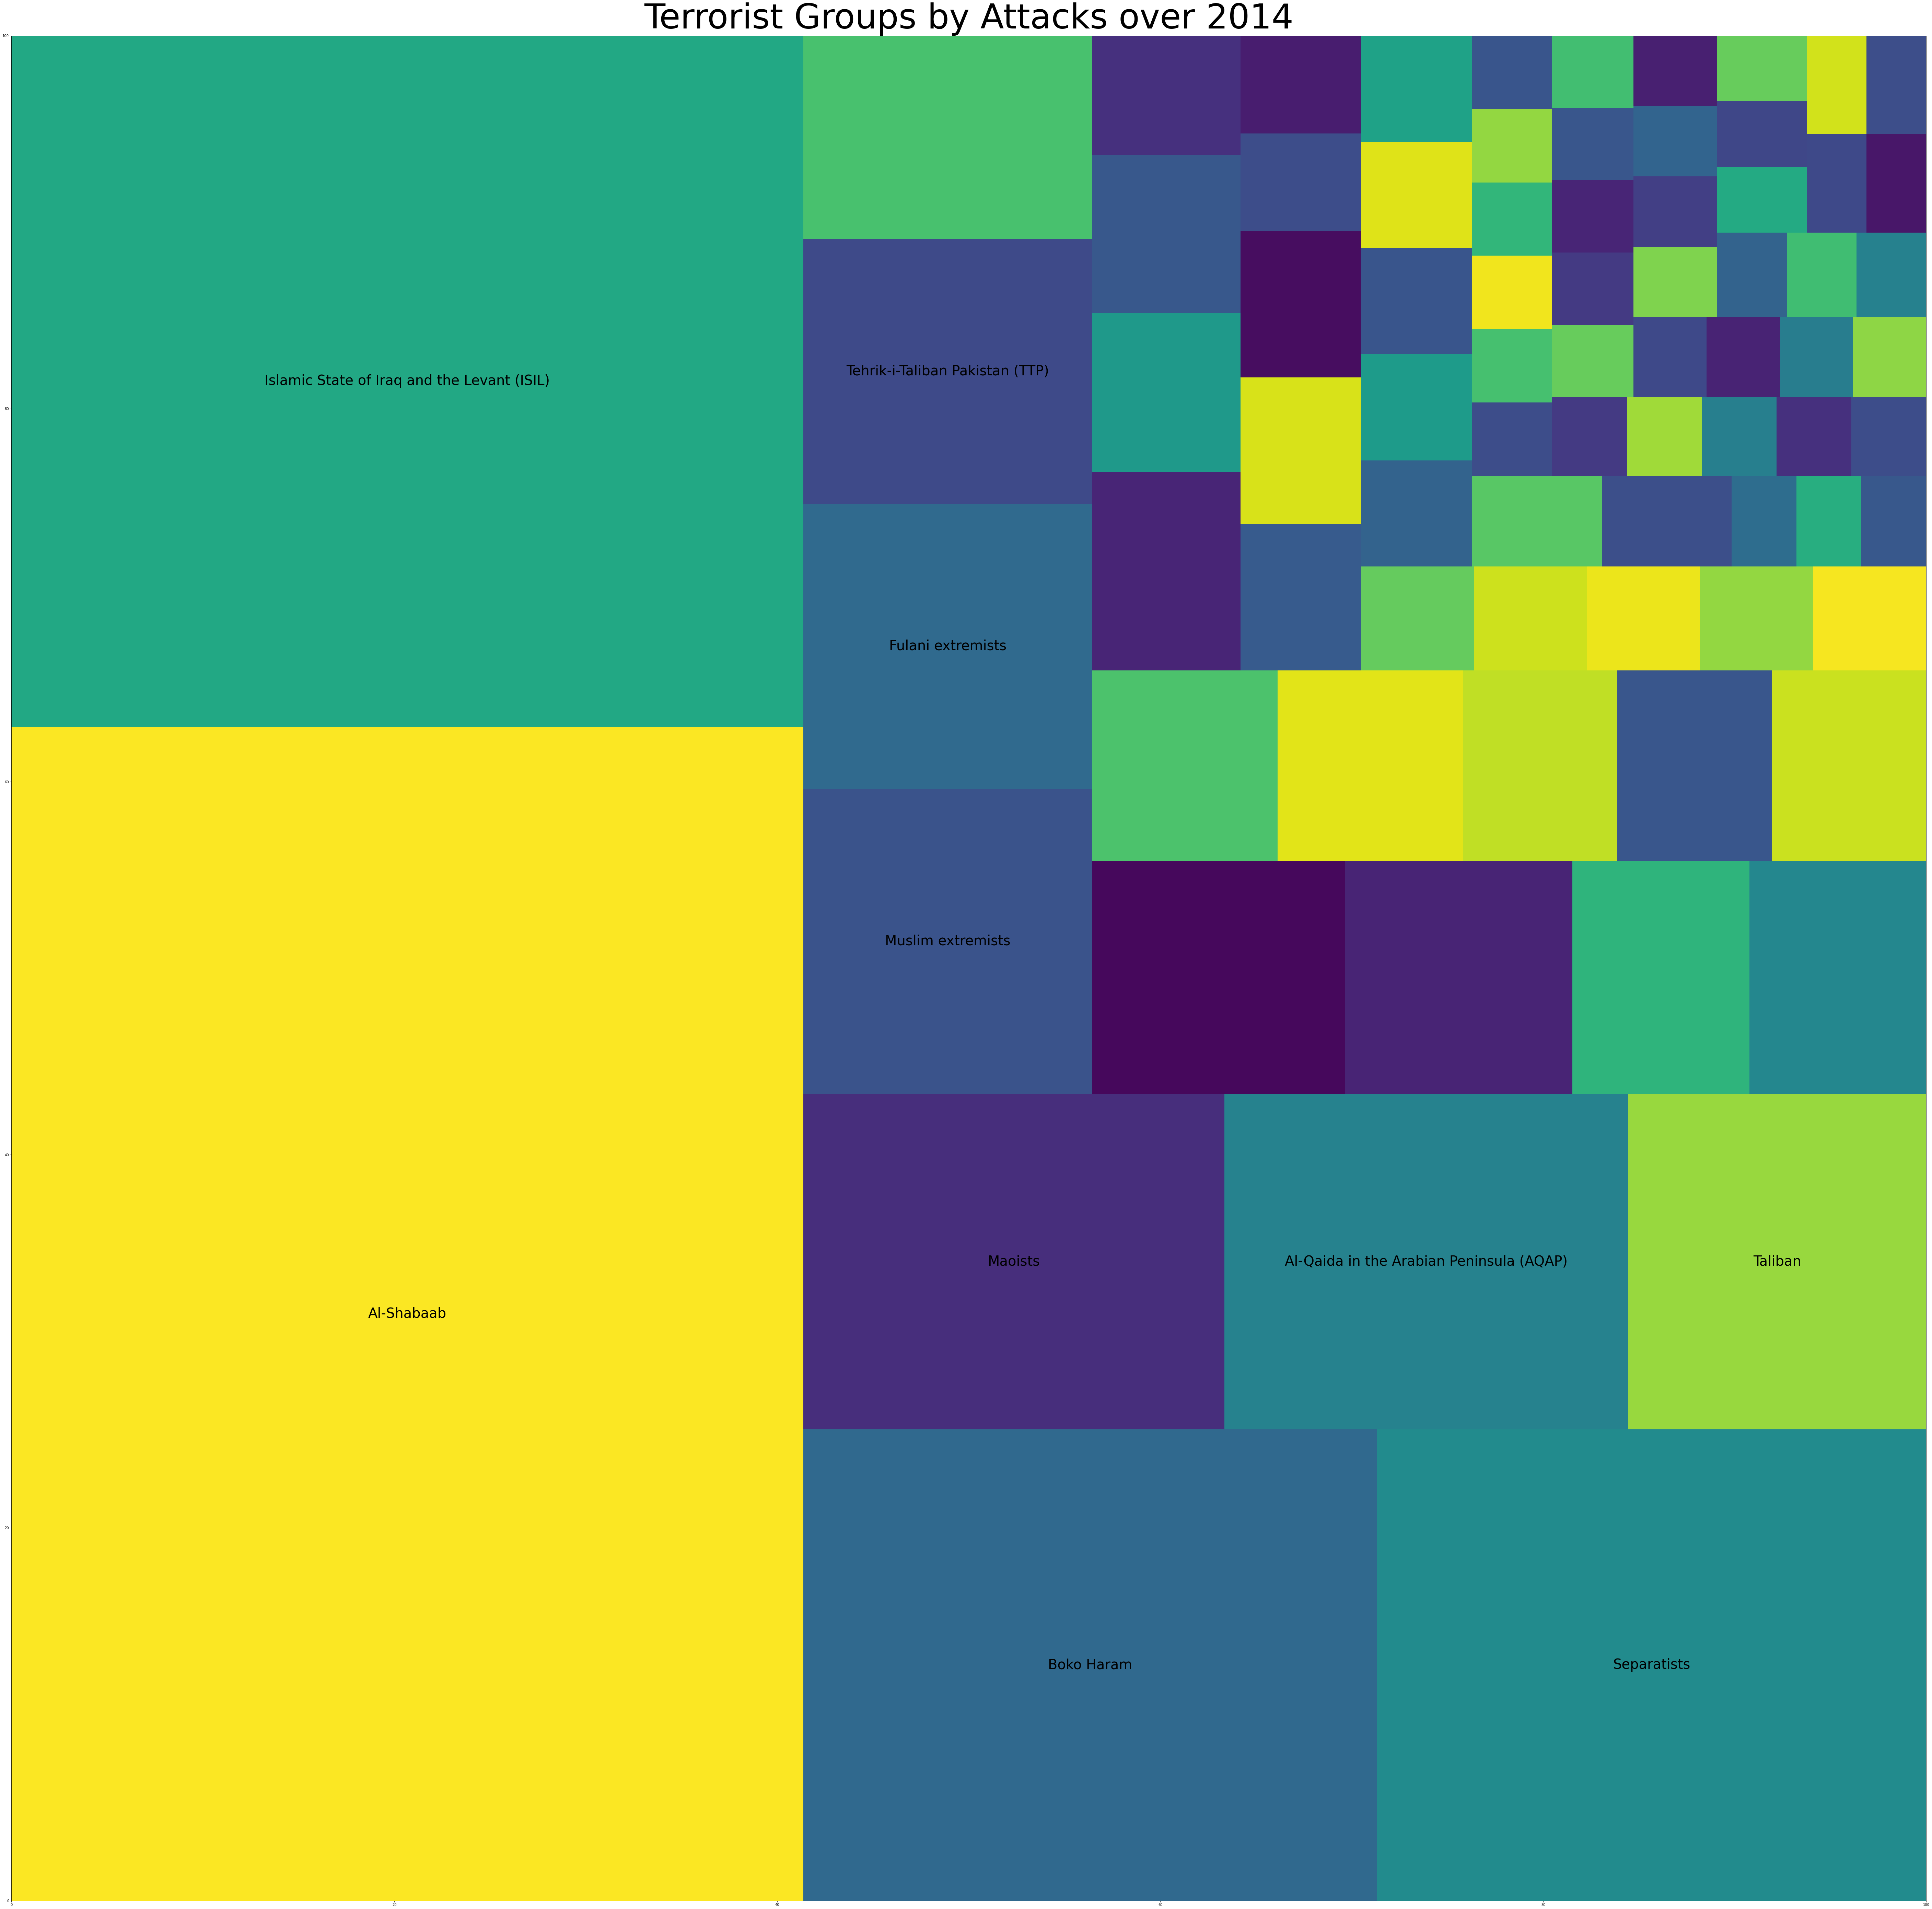

In [79]:
terrgrp_count = Counter(terr_grp1_2014['gname'])
fig_terrgrp = pd.DataFrame.from_dict(terrgrp_count, orient='index')

terr_grp1_names = list(fig_terrgrp.index)
terr_grp1_incidents = list(fig_terrgrp[0])

test = pd.DataFrame(terr_grp1_names, columns = ['gname'])
test['incidents'] = terr_grp1_incidents
test = test.sort_values('incidents', ascending=False)

fig, ax = plt.subplots(figsize=(100,100))
sizes=test['incidents']
label=test['gname'][0:10]
ax.set_title('Terrorist Groups by Attacks over 2014', fontsize = 100)
squarify.plot(sizes=sizes, label=label, text_kwargs={'fontsize':40, 'wrap':True})
plt.show()

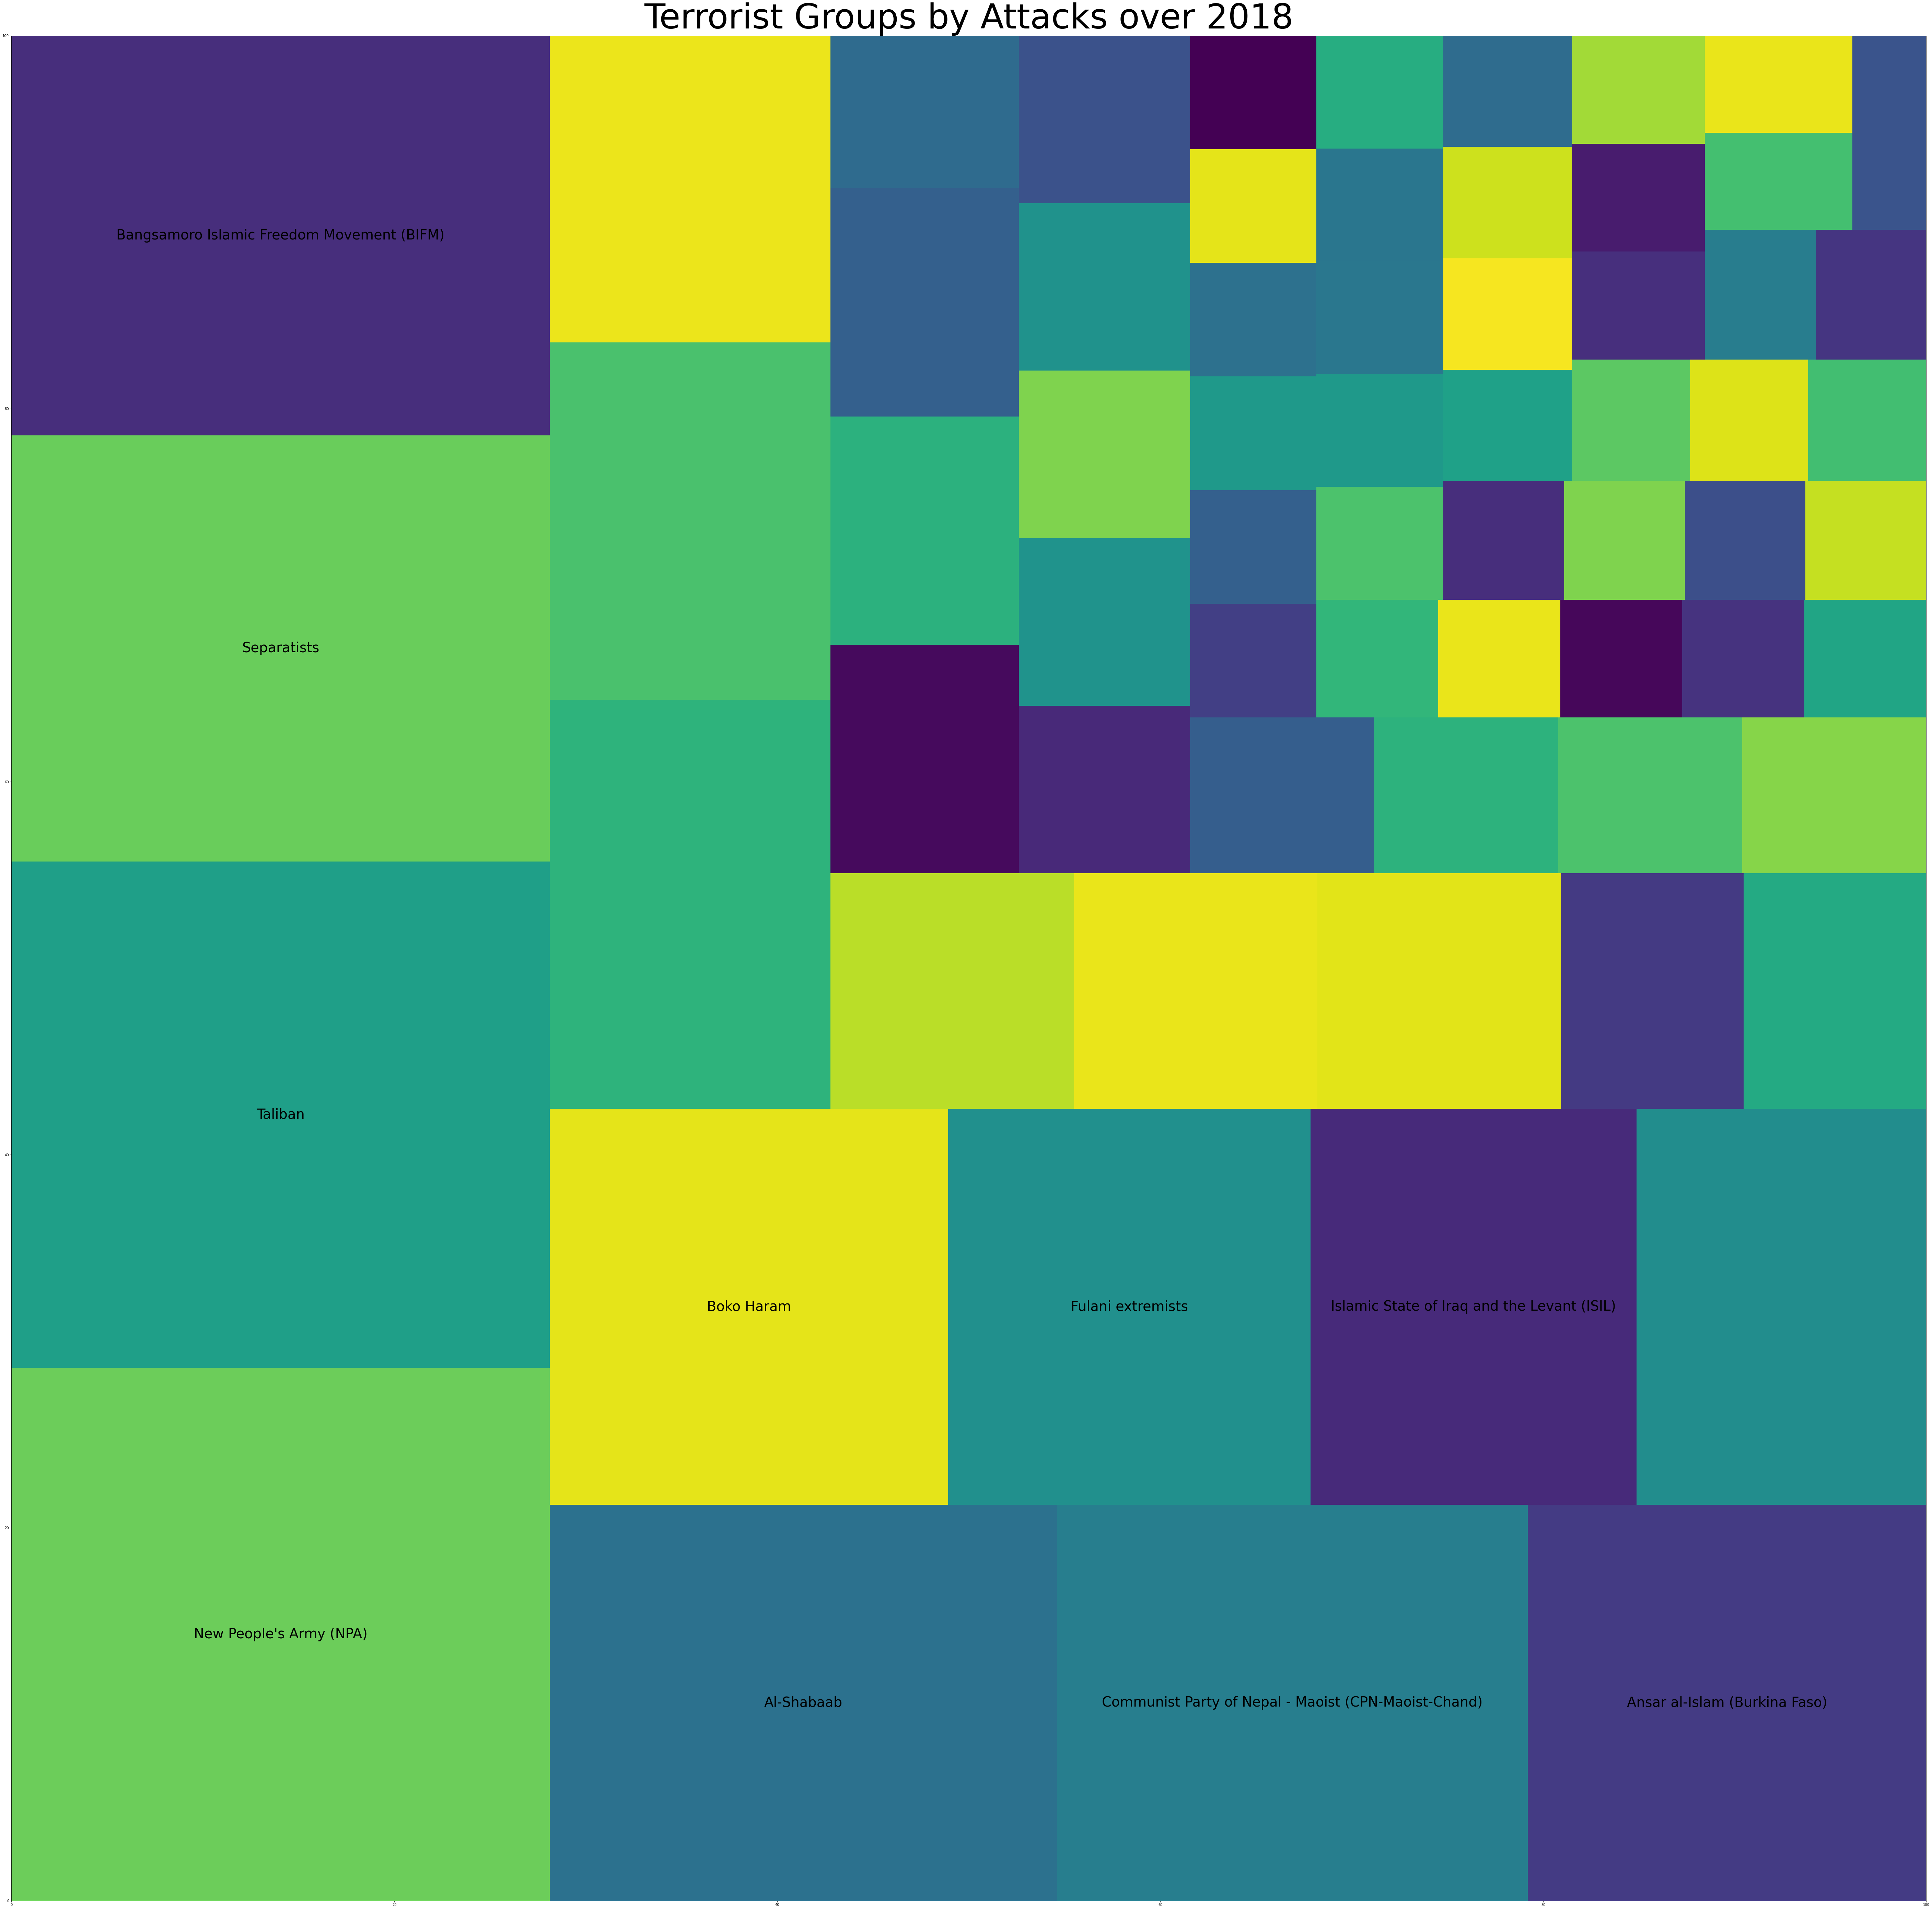

In [80]:
terrgrp_count = Counter(terr_grp1_2018['gname'])
fig_terrgrp = pd.DataFrame.from_dict(terrgrp_count, orient='index')

terr_grp1_names = list(fig_terrgrp.index)
terr_grp1_incidents = list(fig_terrgrp[0])

test = pd.DataFrame(terr_grp1_names, columns = ['gname'])
test['incidents'] = terr_grp1_incidents
test = test.sort_values('incidents', ascending=False)

fig, ax = plt.subplots(figsize=(100,100))
sizes=test['incidents']
label=test['gname'][0:10]
ax.set_title('Terrorist Groups by Attacks over 2018', fontsize = 100)
squarify.plot(sizes=sizes, label=label, text_kwargs={'fontsize':40, 'wrap':True})
plt.show()

In [81]:
import math

def get_distance(point1, point2):
    R = 6370
    lat1 = math.radians(point1[0])  #insert value
    lon1 = math.radians(point1[1])
    lat2 = math.radians(point2[0])
    lon2 = math.radians(point2[1])

    dlon = lon2 - lon1
    dlat = lat2- lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = R * c
    return distance

In [82]:
opt_clust_data = gtd[((gtd['nkill'] >= 1) | (gtd['nperps'] >= 1) | (gtd['nwound'] >= 1) | (gtd['property'] == 1))]

In [83]:
opt_clust_data = opt_clust_data[(opt_clust_data['guncertain1'] == 1)]
opt_clust_data

eventid  iyear  imonth  iday  extended  country_txt  \
25059   201001010003   2010       1     1         0     Pakistan   
25069   201001010013   2010       1     1         0     Pakistan   
25071   201001010015   2010       1     1         0     Pakistan   
25085   201001060006   2010       1     6         0     Pakistan   
25099   201001100001   2010       1    10         0  Afghanistan   
...              ...    ...     ...   ...       ...          ...   
121531  201812280002   2018      12    28         0     Thailand   
121538  201812280011   2018      12    28         0     Thailand   
121542  201812280015   2018      12    28         0     Thailand   
121543  201812280016   2018      12    28         0     Thailand   
121544  201812280017   2018      12    28         0     Thailand   

                                  provstate              city   latitude  \
25059   Federally Administered Tribal Areas  Orakzai district  33.697271   
25069   Federally Administered Tribal Areas   Bajaur district  34.856902   
25071          North-West Frontier Province  Shah Hassan Khel  32.431245   
25085   Federally Administered Tribal Areas   Bajaur district  34.856902   
25099                                Faryab        Dawlatabad  36.420551   
...                                     ...               ...        ...   
121531                           Narathiwat            Kalisa   6.224650   
121538                           Narathiwat   Chanae district   6.068226   
121542                           Narathiwat             Sakor   6.227974   
121543                           Narathiwat             La-or   6.151884   
121544                           Narathiwat         Khok Yamu   6.247924   

         longitude  ... nkill_impute  nwound_impute  nwoundte_impute  \
25059    71.144852  ...          0.0            0.0              0.0   
25069    71.429936  ...          6.0            0.0              0.0   
25071    70.965876  ...        100.0           87.0              0.0   
25085    71.429936  ...          0.0            0.0              0.0   
25099    64.893890  ...          4.0            2.0              0.0   
...            ...  ...          ...            ...              ...   
121531  101.649912  ...          0.0            0.0              0.0   
121538  101.661293  ...          0.0            0.0              0.0   
121542  101.507905  ...          0.0            4.0              0.0   
121543  101.484025  ...          0.0            0.0              0.0   
121544  102.003296  ...          0.0            0.0              0.0   

        nhostkid_impute  nperps_norm  nperpcap_norm  nkill_norm  nwound_norm  \
25059               NaN          NaN            NaN         NaN          NaN   
25069               NaN          NaN            NaN    0.261204          NaN   
25071               NaN          NaN       0.767857    0.671345     0.610662   
25085               NaN          NaN            NaN         NaN          NaN   
25099               NaN          NaN            NaN    0.202095     0.094780   
...                 ...          ...            ...         ...          ...   
121531              NaN          NaN            NaN         NaN          NaN   
121538              NaN          NaN            NaN         NaN          NaN   
121542              NaN          NaN            NaN         NaN     0.189560   
121543              NaN          NaN            NaN         NaN          NaN   
121544              NaN          NaN            NaN         NaN          NaN   

       nwoundte_norm  nhostkid_norm  
25059            NaN            NaN  
25069            NaN            NaN  
25071            NaN            NaN  
25085            NaN            NaN  
25099            NaN            NaN  
...              ...            ...  
121531           NaN            NaN  
121538           NaN            NaN  
121542           NaN            NaN  
121543           NaN            NaN  
121544           NaN            NaN  



In [84]:
all_points = opt_clust_data[['latitude', 'longitude']].values

In [85]:
all_points.shape

(4740, 2)

In [86]:
import scipy

dm = scipy.spatial.distance.cdist(all_points, all_points, get_distance)

In [87]:
dm.shape

(4740, 4740)

In [88]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec

In [89]:
clust = OPTICS(min_samples=5, metric = 'precomputed', cluster_method = 'dbscan')

In [90]:
clust.fit(dm)

OPTICS(cluster_method='dbscan', metric='precomputed')

In [91]:
labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=0.5)

In [92]:
labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=2)

In [93]:
labels_008 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=0.08)

In [94]:
opt_clust_data['labels_050'] = labels_050
opt_clust_data['labels_200'] = labels_200
opt_clust_data['labels_008'] = labels_008

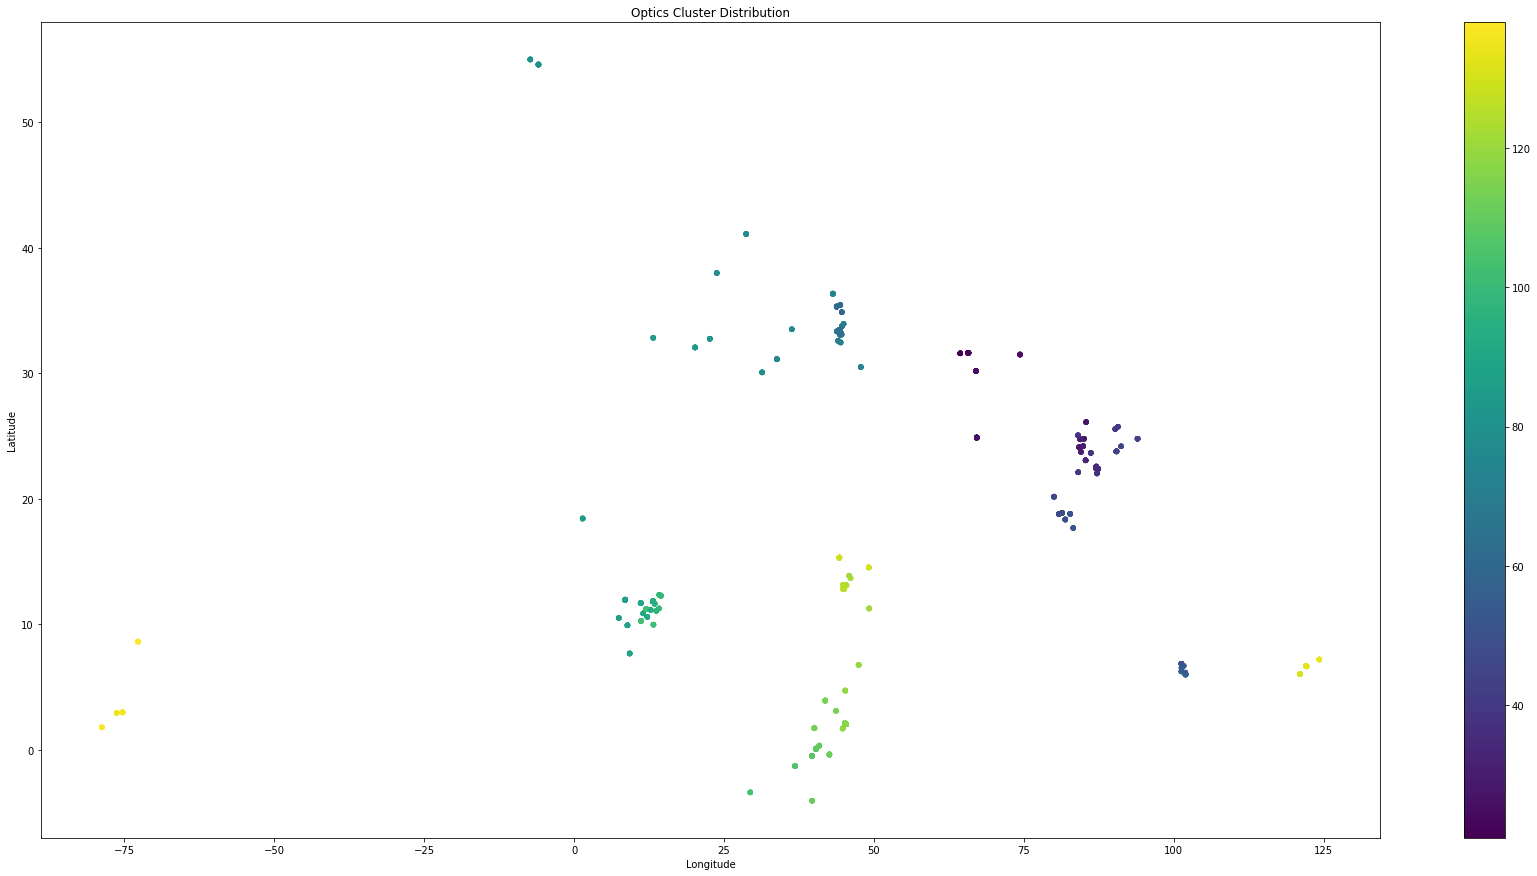

In [95]:
test = opt_clust_data[(opt_clust_data['labels_050'] > 20)]

fig1, ax3 = plt.subplots(figsize=(30,15))
scatter = ax3.scatter(test['longitude'], test['latitude'], c=test['labels_050'], s=20, cmap="viridis")
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
plt.colorbar(scatter)
ax3.set_title('Optics Cluster Distribution')
plt.show()

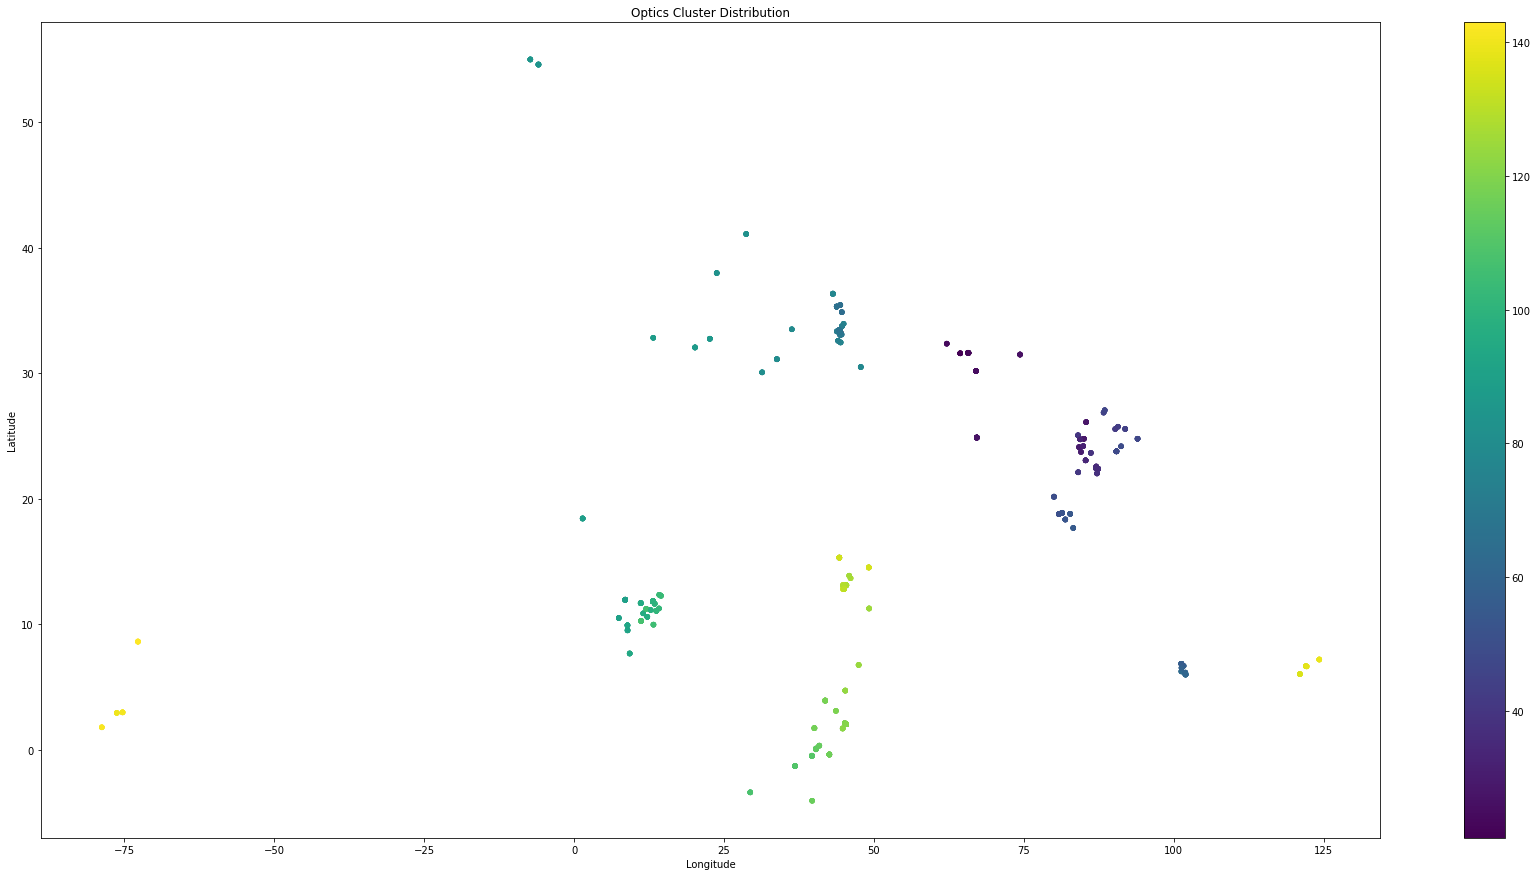

In [96]:
test = opt_clust_data[(opt_clust_data['labels_200'] > 20)]

fig1, ax3 = plt.subplots(figsize=(30,15))
scatter = ax3.scatter(test['longitude'], test['latitude'], c=test['labels_200'], s=20, cmap="viridis")
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
plt.colorbar(scatter)
ax3.set_title('Optics Cluster Distribution')
plt.show()

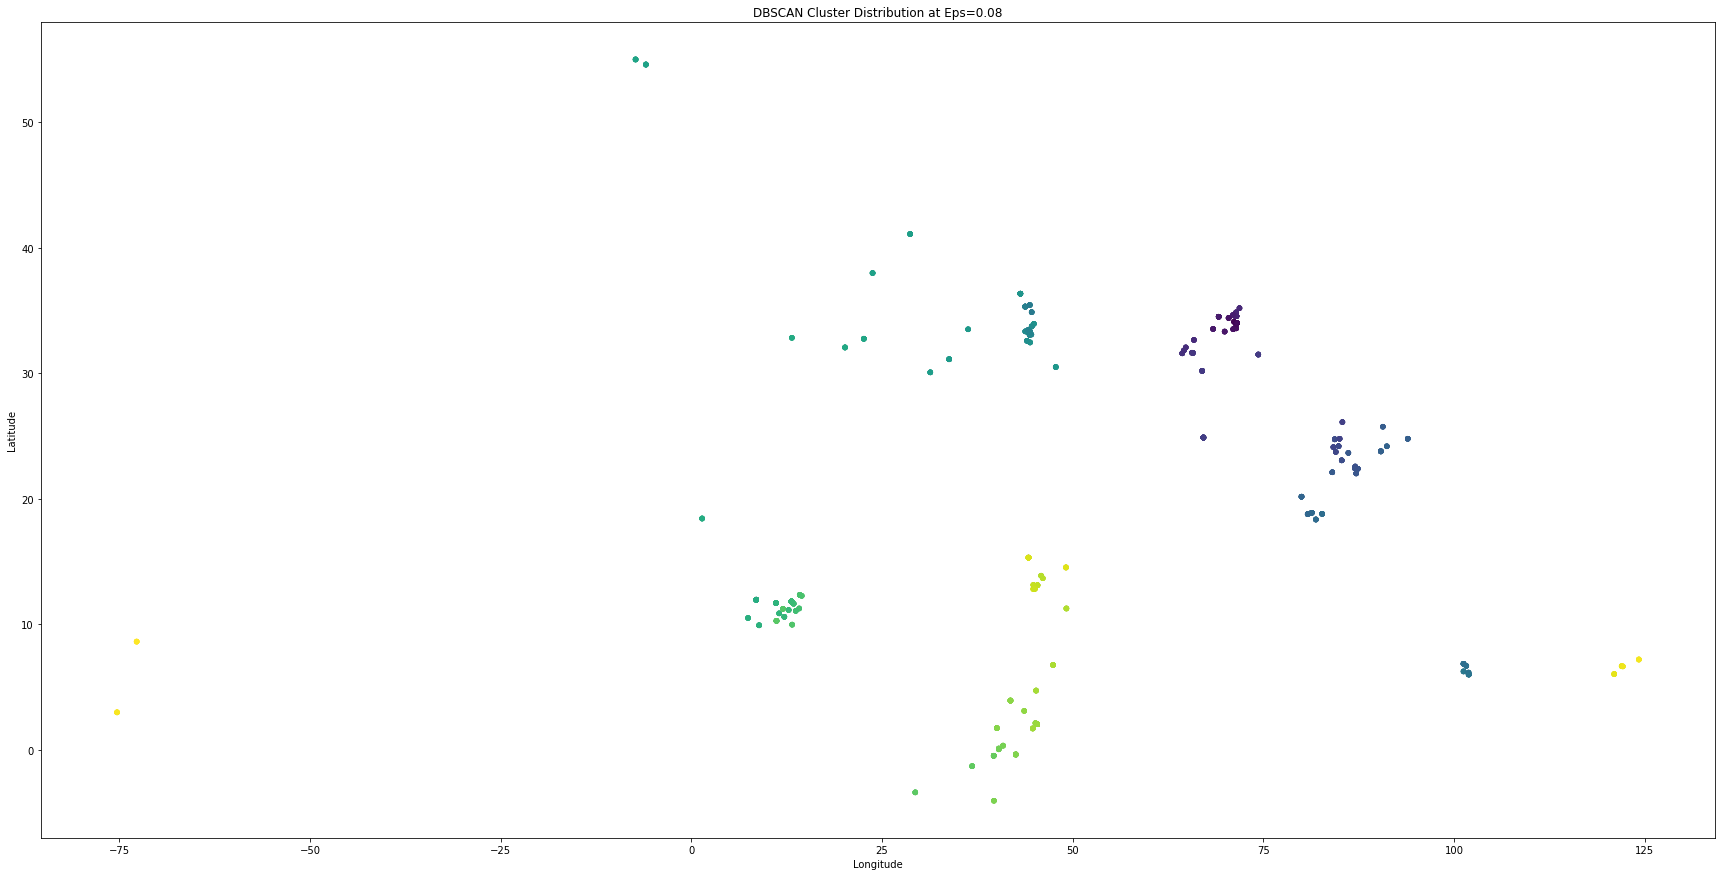

In [99]:
#test = opt_clust_data
test = opt_clust_data[(opt_clust_data['labels_008'] > 0)]

fig1, ax3 = plt.subplots(figsize=(30,15))
scatter = ax3.scatter(test['longitude'], test['latitude'], c=test['labels_008'], s=20, cmap="viridis")
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
#plt.colorbar(scatter)
ax3.set_title('DBSCAN Cluster Distribution at Eps=0.08')
plt.show()

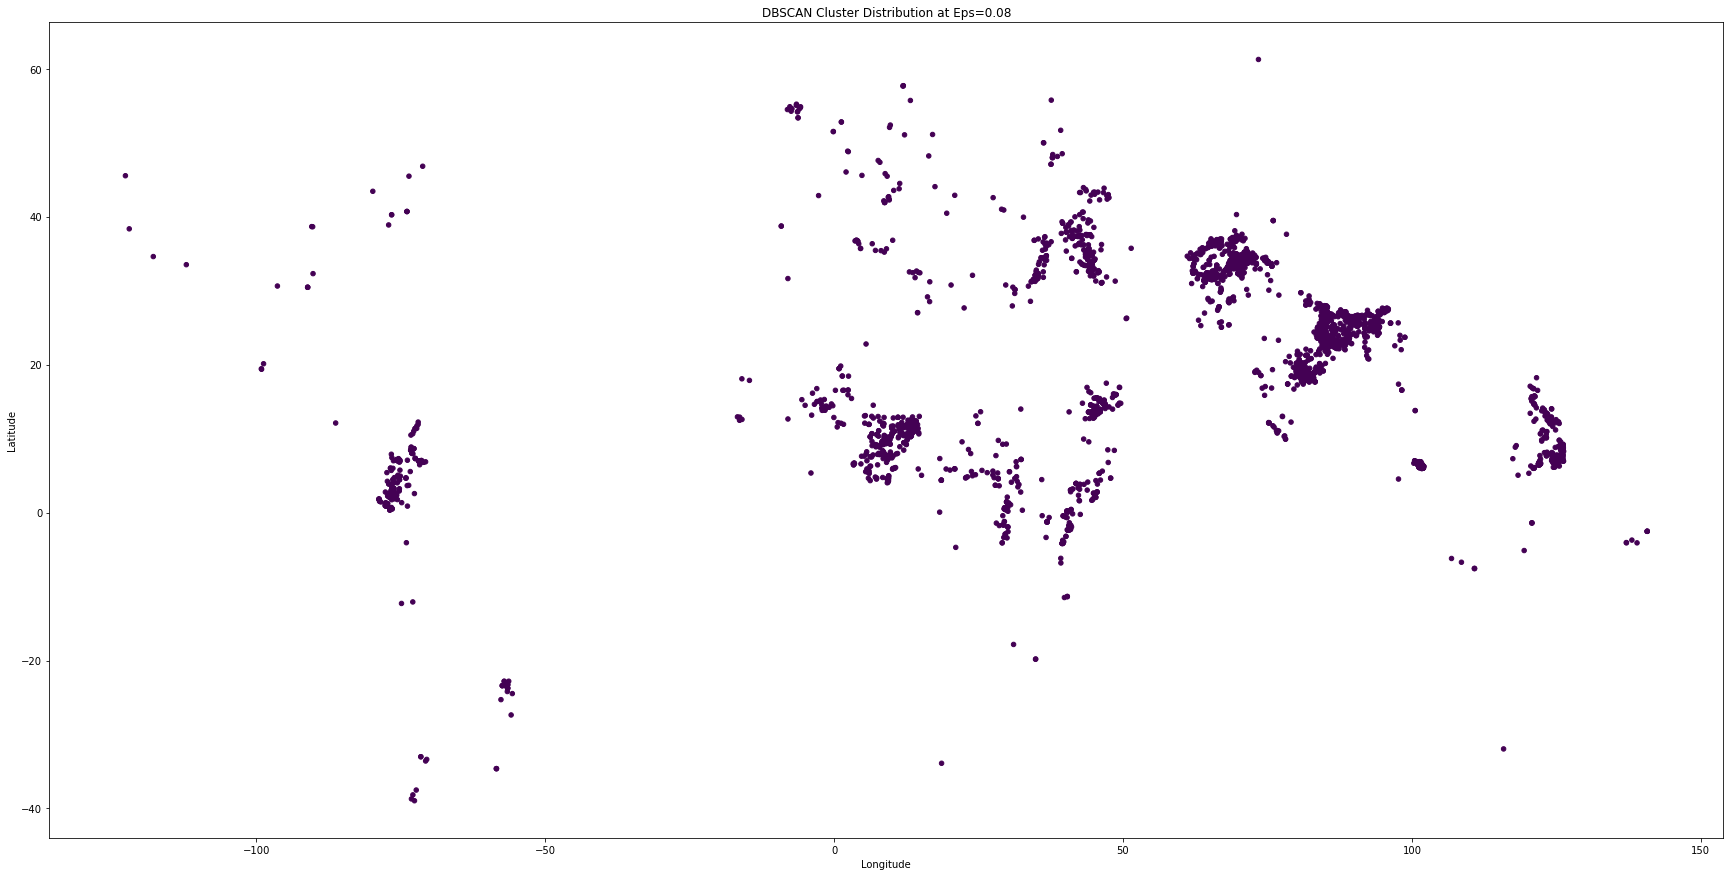

In [98]:
test = opt_clust_data
#test = opt_clust_data[(opt_clust_data['labels_008'] > 20)]
test = opt_clust_data[(opt_clust_data['labels_008'] == -1)]

fig1, ax3 = plt.subplots(figsize=(30,15))
ax3.scatter(test['longitude'], test['latitude'], c=test['labels_008'], s=20, cmap="viridis")
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
ax3.set_title('DBSCAN Cluster Distribution at Eps=0.08')
plt.show()